In [ ]:
# Manipulação dos Dados
import numpy as np
import pandas as pd
import json

from sklearn import preprocessing
 
# Visualização dos Dados
import matplotlib.pyplot as plt
import seaborn as sns
 
# Machine Learning

In [ ]:
df_artists = pd.read_csv('artists.csv')

In [ ]:
df_tracks = pd.read_csv('tracks.csv')

In [ ]:
with open('dict_artists.json', 'r') as f:
  data = json.load(f)

related_artists = pd.DataFrame().from_dict(data, orient='index').reset_index()
related_artists.rename(columns={'index' : 'id_artist'}, inplace=True)

# DataFrame **Artists**

In [ ]:
df_artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345.0,[],Cody Longo,8
1104345,1ljurfXKPlGncNdW3J8zJ8,2123.0,['deep acoustic pop'],Right the Stars,18
1104346,2vnT9YhKIvjVo9LnVjWmr2,26.0,[],Jesse Giddings,0
1104347,3ID0E5XCvnJIYZEq043ZoB,406.0,[],The Boy Band Project,0


In [ ]:
df_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


'FOLLOWERS' É A ÚNICA COLUNA COM VALORES NaN

In [ ]:
df_artists.describe()

,followers,popularity
count,1.104336e+06,1.104349e+06
mean,1.074304e+04,9.083884e+00
std,2.609554e+05,1.376310e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.900000e+01,2.000000e+00
75%,4.510000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


In [ ]:
df_artists[df_artists.duplicated()]

,id,followers,genres,name,popularity


MATRIZ DE CORRELAÇÃO DENTRE AS VARIÁVEIS DO *df_artists*

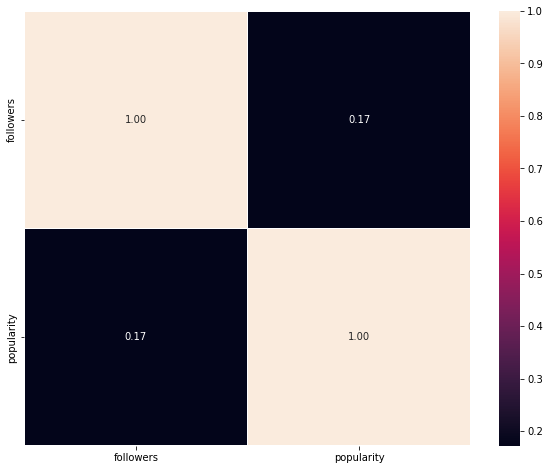

In [ ]:
matrix_artists = df_artists.corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_artists, annot=True, linewidths=0.5, fmt=".2f")

# - artist id : *hash* que identifica o artista

In [ ]:
df_artists['id'].nunique()

1104349

In [ ]:
type(df_artists['id'][0])

str

In [ ]:
# O Dtype da coluna foi convertido para String, para ser usado nas próximas etapas

df_artists['id'] = df_artists['id'].astype('string')

**Conclusões**

1.   Cada artista possui um id único


# - artist followers : quantidade de seguidores que o artista tem


TRATANDO VALORES FALTANTES

In [ ]:
df_artists.loc[df_artists['followers'].isnull()]

,id,followers,genres,name,popularity
444199,7F71W80jaXFARK7hBjsDI2,NaN,['czech pop'],Marcell,36
444200,3MLHJz04KmEVzCTPclzkEm,NaN,['czech pop'],Niko,21
444797,0cqZsULDZdJTGA4Zqh8Ckv,NaN,[],Savzilla,0
444798,0BuknWzKujyc9HfZ1V50Uk,NaN,[],Duck Doja,0
446635,6ltU5gIDLmWNYaVNHnll5G,NaN,['mexican electronic'],Zofa,0
446636,7C9nWRMbRqpPUuKh2OEw9n,NaN,[],MHV,3
446637,41c30F8zy5UCTSevbn0WfD,NaN,['mexican electronic'],Broadband Star,0
468525,1DK979aOesiZ4Vkus8txqu,NaN,[],AmorArtis Orchestra & Johannes Somary,2
468526,6jkpqSWWsXSuqtsoeAiMDU,NaN,['uk americana'],Police Dog Hogan,14
468527,7aMdHPv79qOuqqBD6TnaCp,NaN,[],"Miles Davis & Charlie ""Bird"" Parker",0


Como temos poucos artistas com valores faltantes no item de Seguidores, será pesquisado os valores reais manualmente na plataforma, e os incluiremos a seguir:

In [ ]:
spotify_followers = {'Marcell' : 344839, 'Niko' : 467, 'Savzilla' : 16, 'Duck Doja' : 10, 
                     'Zofa' : 7, 'MHV' : 117, 'Broadband Star' : 9, 'AmorArtis Orchestra & Johannes Somary' : 15, 
                     'Police Dog Hogan' : 1081, 'Miles Davis & Charlie "Bird" Parker' : 12461, 'Black Dog Prowl' : 198, 
                     'Band of the Fifteenth Field Artillery Regiment, RCA': 27, 'Robert Steven Williams' : 7}

In [ ]:
df_artists['followers'] = df_artists['followers'].fillna(df_artists['name'].map(spotify_followers))

In [ ]:
df_artists['followers'].isnull().any()

False

Os dados serão convertidos para int, visto que não existem Seguidores decimais

In [ ]:
df_artists['followers'] = df_artists['followers'].astype('int')

IDENTIFICANDO OS OUTLIERS

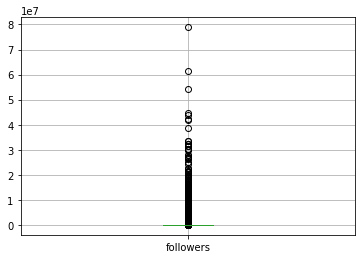

In [ ]:
df_artists.boxplot(column=['followers'])

In [ ]:
df_artists['followers'].describe()

count    1.104349e+06
mean     1.074324e+04
std      2.609541e+05
min      0.000000e+00
25%      1.000000e+01
50%      5.900000e+01
75%      4.510000e+02
max      7.890023e+07
Name: followers, dtype: float64

In [ ]:
q1 = df_artists['followers'].quantile(0.25)
q3 = df_artists['followers'].quantile(0.75)

IQR = q3 - q1

In [ ]:
followers_outliers = q3 + 1.5 * IQR

In [ ]:
len( df_artists[df_artists['followers'] >= followers_outliers] )

187927

ANÁLISE DA QUANTIDADE DE SEGUIDORES

In [ ]:
# Os 15 artistas com maior número de Seguidores

df_artists[['followers', 'name']].sort_values('followers', ascending=False).head(15)

,followers,name
144138,78900234,Ed Sheeran
144485,61301006,Ariana Grande
313676,54416812,Drake
144481,44606973,Justin Bieber
144488,43747833,Eminem
313508,42244011,Rihanna
126658,41792604,Billie Eilish
126338,38869193,Taylor Swift
126339,33665795,Imagine Dragons
144496,33483326,Queen


In [ ]:
# Os 15 maiores conjuntos de artistas, com base na quantidade de Seguidores

df_artists['followers'].value_counts().sort_values(ascending=False).head(15)

0     67875
1     35979
2     27956
3     24906
4     22155
5     20162
6     18299
7     17019
8     15909
9     14668
10    13579
11    12925
12    11785
13    11583
14    10641
Name: followers, dtype: int64

*   Ao agruparmos os artistas com base na quantidade de seus seguidores, percebe-se uma tendência de que, quanto MAIS seguidores, MENOS artistas agrupados (sendo que o maior conjunto de artistas é aquele com zero seguidores)
*   Analisaremos isso graficamente



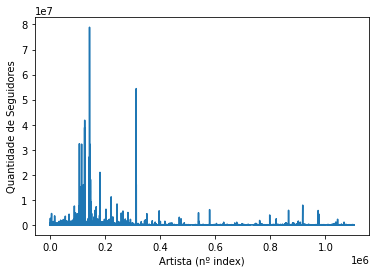

In [ ]:
df_artists['followers'].plot(xlabel='Artista (nº index)', ylabel='Quantidade de Seguidores')

*   O dataset contém artistas com quantidade de seguidores muito diversos entre si (de 0 a 70MM+).
*   Assim, para um melhor entendimento do todo, a visualização da quantidade de seguidores será fracionada

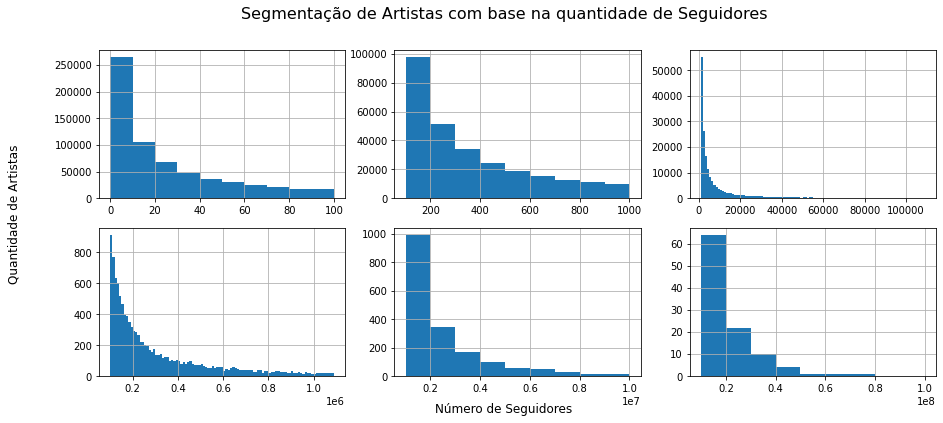

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 6))
ax = axs.ravel()

fig.suptitle('Segmentação de Artistas com base na quantidade de Seguidores', fontsize=16)
fig.text(0.5, 0.04, 'Número de Seguidores', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Quantidade de Artistas', va='center', rotation='vertical', fontsize=12)

ranges = [range(0, 110, 10), range(100, 1100, 100), 
          range(1000, 110000, 1000), range(100000, 1100000, 10000), 
          range(1000000, 11000000, 1000000), range(10000000, 110000000, 10000000)]

for i in range(6):
  df_artists['followers'].hist(bins=ranges[i], ax=ax[i])

plt.show()

**Conclusões**

1.   Considerando os quartis no método *describe*, identificamos que 25% de todo o dataset possui até 10 seguidores
2.   75% dos artistas possuem até 451 seguidores
3.   Os demais artistas (25%) constam com uma quantidade "desproporcional" aos demais, chegando a terem mais de 78 milhões, como é o caso de Ed Sheeran
4.   Identificamos, então, que 187.927 são outliers considerando a quantidade de seus Seguidores, o que mostra que, de forma macro, os artistas têm padrões de quantidade de seguidores muito diferentes entre si
5.   É possível perceber que, quanto maior o número de Seguidores, menor a quantidade de Artistas com tal atributo

# - artist genres : gêneros musicais do artista

TRANSFORMANDO A COLUNA DE GÊNEROS EM LISTA

In [ ]:
df_artists['genres'] = list(df_artists['genres'].replace('[]', 'not specified'))

In [ ]:
for char in ["[", "]", "'", "\""]:
  df_artists['genres'] = df_artists['genres'].str.replace(char, "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df_artists['genres'] = df_artists['genres'].str.split(", ")

CRIAÇÃO DE UM DATAFRAME ESPECÍFICO DE GÊNEROS MUSICAIS

In [ ]:
genres = df_artists.explode('genres')['genres']

In [ ]:
df_genres = pd.DataFrame(np.sort(genres.unique()), columns=['genre_name'])

In [ ]:
pd.set_option('display.max_rows', None)
print(df_genres)
pd.reset_option('display.max_rows')

                                   genre_name
0                      21st century classical
1                                       432hz
2                                         48g
3                                       8-bit
4                                          8d
5                                  a cappella
6                                          a3
7                                aarhus indie
8                              aberdeen indie
9                                    abstract
10                             abstract beats
11                           abstract hip hop
12                               abstract idm
13                                 abstractro
14                                  accordeon
15                                  accordion
16                                 acid house
17                                   acid idm
18                                  acid jazz
19                                  acid rock
20                                

In [ ]:
df_genres.to_csv('genres.csv', index=False) 

**Conclusões:**

1.   Temos 5365 gêneros musicais do dataset (exceto 'não especificado')
2.   Muitos gêneros existentes são, na verdade, subdivisões de outros gêneros com base em regionalidades. Ex.: (ukrainian folk, ukrainian hip hop, ukrainian indie,  ukrainian metal, ukrainian pop)
3.   Existem 68 subgêneros apenas de musicas italianas, 59 suecas, 25 turcas, entre outros
4.   Talvez seja válido criar uma relação entre gêneros, assim como já existe entre os artistas, para criar recomendações







# - artist name : nome do artista



IDENTIFICANDO ARTISTAS DUPLICADOS

In [ ]:
duplicated_artists = df_artists[df_artists.duplicated(subset=['name'])]
duplicated_artists

,id,followers,genres,name,popularity
556,2EIDNRLlK40vvt5EyhiwFE,12722,[not specified],Los Bonys,31
2363,6D40RuzdpIC5ip4yL2UUvD,12946,[belgian pop],Suarez,37
3029,7vOAn1z0BOIyxKV59lSUMp,303,[not specified],BNR,17
3059,3F7y6OKpRQVTYknMF3weXr,931,[bulgarian rock],Signal,19
3123,4ubUEsQ5s7FJpJthJjvop0,4929,[bulgarian hip hop],Spens,18
...,...,...,...,...,...
1104277,4wf6GGNBqaU79839E6yjfn,1182,[not specified],Speed,15
1104279,0Iv7bsODzqbmMkC6pylYYN,8667,"[mathcore, metallic hardcore]",Chamber,28
1104280,65kdSVYKtaef3P8EOCGWHl,6899,"[australian post-hardcore, melodic hardcore]",Bloom,34
1104281,0iG7bYgNYz3PUqjAIrgiFu,2375,[australian metalcore],Graves,15


**Conclusões:**

1.   Existem diversos artistas com mesmo nome no catálogo do Spotify que se tratam, de fato, do mesmo artista com mais de um registro
2.   É importante que os artistas de nome duplicado não sejam excluídos do 
dataset, isso porque podem haver perdas ao gerar recomendações (exclusão de faixas do catálogo)

# - artist popularity : nível de popularidade do artista

In [ ]:
df_artists['popularity'].describe()

count    1.104349e+06
mean     9.083884e+00
std      1.376310e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      1.400000e+01
max      1.000000e+02
Name: popularity, dtype: float64

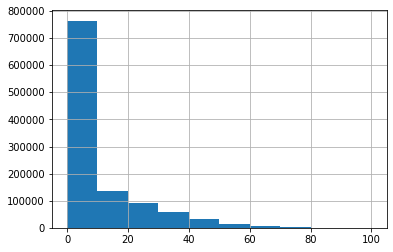

In [ ]:
df_artists['popularity'].hist()

In [ ]:
# Os 15 artistas com maior Popularidade

df_artists[['popularity', 'name']].sort_values('popularity', ascending=False).head(15)

        # Os 15 artistas com maior Popularidade

,popularity,name
144481,100,Justin Bieber
115489,98,Bad Bunny
126338,98,Taylor Swift
313676,98,Drake
144484,96,BTS
115490,96,Juice WRLD
144483,96,The Weeknd
144485,95,Ariana Grande
144486,95,J Balvin
115491,95,Myke Towers


In [ ]:
# Os 15 maiores conjuntos de artistas, com base na Popularidade

df_artists['popularity'].value_counts().sort_values(ascending=False).head(15)

0     467416
1      74593
2      47594
3      36371
4      29567
5      26680
6      23735
7      21119
8      19592
9      17615
10     16761
11     15795
12     15047
13     14393
14     13586
Name: popularity, dtype: int64

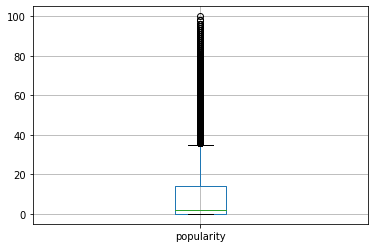

In [ ]:
df_artists.boxplot(column=['popularity'])

In [ ]:
q1 = df_artists['popularity'].quantile(0.25)
q3 = df_artists['popularity'].quantile(0.75)

IQR = q3 - q1

In [ ]:
popularity_outliers = q3 + 1.5 * IQR

In [ ]:
len( df_artists[df_artists['popularity'] >= popularity_outliers] )

82156

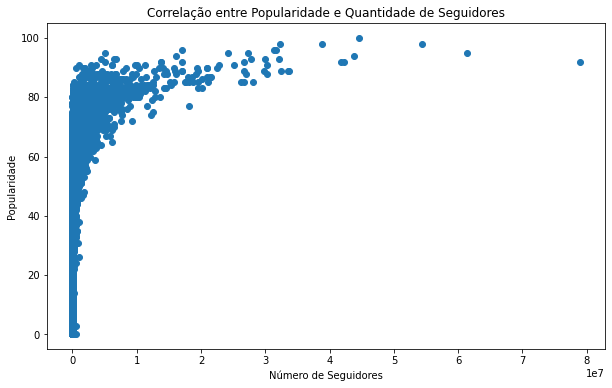

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_artists['followers'], df_artists['popularity'])

plt.title('Correlação entre Popularidade e Quantidade de Seguidores')
plt.xlabel('Número de Seguidores')
plt.ylabel('Popularidade');

**Conclusões**

1.   Observa-se que a Popularidade é um item que varia de 0 a 100 no dataset
2.   Como é de se esperar, quanto maior o número de Seguidores, maior a Popularidade do Artista
3.   O artista com maior Popularidade (Justin Bieber), porém, não é o artista com maior nº de Seguidores (mas ocupa o 3º quartil, com 44 milhões de seguidores)
4.   75% de todos os artistas do dataset possuem Popularidade até 14, o que indica que o dataset é composto por artistas que, em sua maioria, possuem baixa Popularidade
5.   82.156 artistas são outliers, considerando a Popularidade






# DataFrame **Tracks**

In [ ]:
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [ ]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

'NAME' É A ÚNICA COLUNA COM VALORES NaN

In [ ]:
df_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [ ]:
df_tracks[df_tracks.duplicated()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [ ]:
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


MATRIZ DE CORRELAÇÃO DENTRE AS VARIÁVEIS DO *df_tracks*

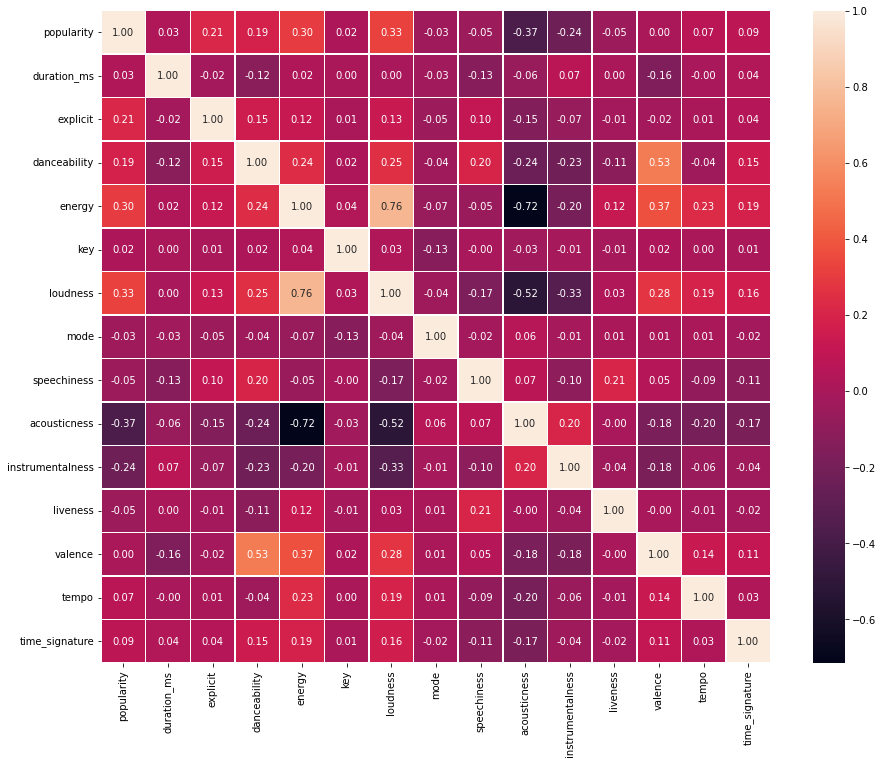

In [ ]:
matrix_tracks = df_tracks.corr()
plt.figure(figsize=(15,12))
sns.heatmap(matrix_tracks, annot=True, linewidths=0.5, fmt=".2f")

**Interpretando a correlação de Pearson**

*   0.9 [+ ou -] indica correlação muito forte
*   0.7 a 0.9 [+ ou -] indica correlação forte
*   0.5 a 0.7 [+ ou -] indica correlação moderada
*   0.3 a 0.5 [+ ou -] indica correlação fraca
*   0 a 0.3 [+ ou -] indica correlação desprezível






In [ ]:
rel = matrix_tracks.unstack().sort_values().drop_duplicates()
negative_rel = rel.loc[rel < -0.5]
positive_rel = rel.loc[(rel > 0.5) & (rel != 1)]

In [ ]:
negative_rel

energy        acousticness   -0.715412
acousticness  loudness       -0.519423
dtype: float64

In [ ]:
positive_rel

valence  danceability    0.528150
energy   loudness        0.764735
dtype: float64

*   OBS.: Vamos perceber, ao longo da análise deste DataFrame, que existem muitos outliers, em praticamente todos os atributos numéricos

**Conclusões:**

1.   *Acousticness* tem uma correlação negativa com *loudness* (moderada) e *energy* (forte)
2.   Existe uma correlação positiva entre *valence* e *danceability* (moderada) e entre *energy* e *loudness* (forte)

# - track id : *hash* que identifica a faixa

In [ ]:
df_tracks['id'].nunique()

586672

In [ ]:
type(df_tracks['id'][0])

str

In [ ]:
# O Dtype da coluna será convertido para String, para ser usado nas próximas etapas

df_tracks['id'] = df_tracks['id'].astype('string')

**Conclusões:**

1.   Cada faixa possui um id único

# - track name : nome da faixa/música

TRATANDO VALORES FALTANTES

In [ ]:
df_tracks.loc[df_tracks['name'].isnull()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226336,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510975,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510976,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510978,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510979,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517206,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517215,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520127,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525238,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [ ]:
df_tracks.loc[df_tracks['name'].isnull(), 'id_artists'].unique()

array(["['0LyfQWJT6nXafLPZqxe9Of']"], dtype=object)

In [ ]:
df_artists.loc[df_artists['id'] == "0LyfQWJT6nXafLPZqxe9Of"]

,id,followers,genres,name,popularity


In [ ]:
df_tracks.dropna(subset=['name'], inplace=True)

*   Foram identificadas 71 canções de um único artista com valores faltantes no dataset
*   Este artista, porém, não existe no *df_artists*, e, portanto, estas canções foram excluídas do dataset


In [ ]:
df_tracks['name'] = df_tracks['name'].str.split(' -').str[0]

In [ ]:
for word in ['Radio Edit', 'Single Version', 'Remastered', 'Remasterizado', 'Remaster']:
  df_tracks['name'] = df_tracks['name'].str.replace(word, "")

RETIRANDO MÚSICAS COM MESMOS NOME E ARTISTA DO DATASET

In [ ]:
df_tracks[df_tracks.duplicated(subset=['name', 'id_artists'])]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
121,5cUFFY2Atw4QeFitueQCt2,El Huerfano,0,159800,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.366,0.0749,7,-26.340,1,0.0806,0.99600,0.924000,0.1170,0.515,90.969,3
230,5eXOIVUkW17FqnEoLR2wTX,Stardust,5,213667,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1923,0.614,0.2980,3,-11.004,0,0.0541,0.97000,0.646000,0.0514,0.772,122.319,4
254,0JTkhdnSpIupvyzRctzhPZ,Chapter 5.19,0,141100,0,['Janusz Korczak'],['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.667,0.2440,5,-18.571,1,0.9540,0.45100,0.000000,0.1350,0.527,79.279,4
255,0Jz6ef3RtrtJVsDF0gx3Xl,Chapter 5.15,0,130200,0,['Janusz Korczak'],['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.705,0.2680,2,-19.633,1,0.9450,0.72900,0.000000,0.1390,0.826,81.718,4
278,0exN2h6nGOlAGbuMKszNnn,Chapter 3.12,0,153800,0,['Janusz Korczak'],['4hLtcEEpjCmBtTnDdzRV4J'],1923-12-27,0.696,0.2830,1,-18.499,1,0.9510,0.86200,0.000000,0.1810,0.695,137.399,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586604,11DUHbs4Vu8M7ppePmszse,誰,45,251077,0,['Yo Lee'],['1D2LuIU6rgg0MGa0l8wYJh'],2018-08-31,0.468,0.2600,1,-9.757,1,0.0386,0.69400,0.000000,0.1090,0.214,128.579,4
586637,1HpzOCZbNWzxvvXfSGtSrX,Find U Again (feat. Camila Cabello),64,176417,0,"['Mark Ronson', 'Camila Cabello']","['3hv9jJF3adDNsBSIQDqcjp', '4nDoRrQiYLoBzwC5Bh...",2019-05-30,0.605,0.6640,8,-7.162,1,0.0316,0.00548,0.000003,0.2040,0.164,103.997,4
586646,0F2muCxmWhi7NfY9poM0KZ,至少我還記得,44,304800,0,['Eric Chou'],['5fEQLwq1BWWQNR8GzhOIvi'],2019-01-10,0.269,0.3680,10,-10.436,1,0.0339,0.72400,0.000003,0.1110,0.337,168.803,4
586647,0mDsJ6a7qY3DWbCAHancPj,King,2,243987,0,['Years & Years'],['5vBSrE1xujD2FXYRarbAXc'],2020-06-26,0.451,0.1950,2,-8.335,1,0.0440,0.95800,0.000003,0.1040,0.286,93.706,4


In [ ]:
df_tracks.drop_duplicates(subset=['name', 'id_artists'], inplace=True)

In [ ]:
len(df_tracks)

496175

**Conclusões:**

1.   Excluímos 71 canções sem nome, de um artista que não existe no *df_artists*
2.   Retiramos, dos títulos das faixas, palavras que podem manter registros duplicados, mas que significam um mesmo item, por exemplo: 'Radio Edit', 'Single Version', 'Remastered', 'Remasterizado', 'Remaster'
3.   Ainda excluimos mais de 60.000 faixas que estavam repetidas, caso consideremos nome da faixa e id do artista

# - tracks popularity : popularidade das faixas

In [ ]:
df_tracks['popularity'].describe()

count    496175.000000
mean         27.426424
std          18.555937
min           0.000000
25%          12.000000
50%          26.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

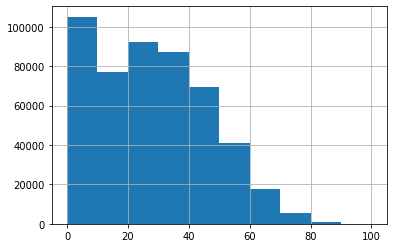

In [ ]:
df_tracks['popularity'].hist()

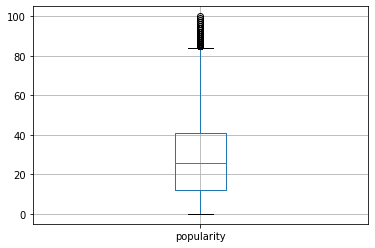

In [ ]:
df_tracks.boxplot(column=['popularity'])

In [ ]:
# As 15 faixas de maior Popularidade

df_tracks[['name', 'artists', 'popularity']].sort_values('popularity', ascending=False).head(15)

,name,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",100
93803,drivers license,['Olivia Rodrigo'],99
93804,Astronaut In The Ocean,['Masked Wolf'],98
92810,Save Your Tears,['The Weeknd'],97
92811,telepatía,['Kali Uchis'],97
92813,Blinding Lights,['The Weeknd'],96
93805,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",96
92814,The Business,['Tiësto'],95
93806,Fiel,"['Los Legendarios', 'Wisin', 'Jhay Cortez']",94
93807,Friday (feat. Mufasa & Hypeman),"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...",94


In [ ]:
# Os 15 maiores conjuntos de faixas, com base na Popularidade

df_tracks['popularity'].value_counts().sort_values(ascending=False).head(15)

0     38468
23    10519
1     10346
22     9731
24     9638
25     9233
21     9159
35     9046
26     9038
33     8987
34     8983
19     8929
36     8927
27     8783
28     8767
Name: popularity, dtype: int64



*   Vamos comparar a popularidade das faixas, com a popularidade dos seus respectivos cantores
*   Para isso, vamos unir os dois DataFrames, através do comando *merge()*



PREPARANDO OS DATASETS PARA O MERGE

*   Antes de unir os DataFrames, vamos transformar as colunas *artists* e *id_artists* em lista, da mesma forma que fizemos com a coluna de *genres*, no *df_artists*
*   Também vamos excluir os eventuais duplicados que forem gerados deste processo
*   OBS.: Este DataFrame resultante será utilizado em outras partes da análise





CONVERTENDO OS ATRIBUTOS DE ARTISTAS DAS FAIXAS EM LISTAS

In [ ]:
for char in ["[", "]", "'", "\""]:
  df_tracks['artists'] = df_tracks['artists'].str.replace(char, "")
df_tracks['artists'] = df_tracks['artists'].str.split(", ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
for char in ["[", "]", "'", "\""]:
  df_tracks['id_artists'] = df_tracks['id_artists'].str.replace(char, "")
df_tracks['id_artists'] = df_tracks['id_artists'].str.split(", ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df_tracks_exploded = df_tracks.explode('id_artists')
df_tracks_exploded.rename(columns={'id' : 'id_track', 'id_artists' : 'id_artist', 'name' : 'track'}, inplace = True)

In [ ]:
df_artists_exploded = df_artists.explode('genres')
df_artists_exploded.rename(columns={'id' : 'id_artist', 'name' : 'artist', 'genres' : 'genre'}, inplace = True)

EXCLUSÃO DE EVENTUAIS ITENS DUPLICADOS

In [ ]:
df_tracks_exploded.drop_duplicates(subset=['id_track', 'id_artist'], inplace=True)

In [ ]:
df_artists_exploded.drop_duplicates(subset=['id_artist', 'genre'], inplace=True)

UNIÃO DOS DATAFRAMES

In [ ]:
df_merged = df_tracks_exploded.merge(df_artists_exploded, how='left', on="id_artist", suffixes=('_track', '_artist'), indicator=True)

In [ ]:
df_merged_sample = df_merged.sample(frac=0.01)

In [ ]:
df_merged.loc[df_merged['artist'].isnull()]

,id_track,track,popularity_track,duration_ms,explicit,artists,id_artist,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genre,artist,popularity_artist,_merge
24486,0VHoDqq7N5VH1UX93Mdyfj,Air,0,268400,0,"[n/a, Johann Sebastian Bach, In Motion]",2pKBejGoRlzAc5VHQ0R26E,1935,0.317,0.317,...,0.95600,0.0868,0.1290,66.296,4,NaN,NaN,NaN,NaN,left_only
24562,0cSyeb33PyBMtLeUzCgDgO,concerto piccolo,0,279600,0,"[n/a, Nitsch, Johannes, In Motion]",2pKBejGoRlzAc5VHQ0R26E,1935,0.535,0.435,...,0.25300,0.1190,0.2050,106.124,4,NaN,NaN,NaN,NaN,left_only
24849,1GYoPjJvGyYufhbxZmAKmF,drume negrita,0,182400,0,"[n/a, Grenet, Ernesto, In Motion]",2pKBejGoRlzAc5VHQ0R26E,1935,0.628,0.661,...,0.23600,0.0572,0.8050,96.198,4,NaN,NaN,NaN,NaN,left_only
25698,2nUaz5sLG0HccdACC1IG35,i know that my redeemer liveth,0,236733,0,"[n/a, Händel, Georg Friedrich (DP), In Motion]",2pKBejGoRlzAc5VHQ0R26E,1935,0.492,0.286,...,0.89200,0.1430,0.2730,87.973,3,NaN,NaN,NaN,NaN,left_only
25704,2oYfdKTcUpk3xJZm0CkHJm,summertime,0,246667,0,"[n/a, George Gershwin, In Motion]",2pKBejGoRlzAc5VHQ0R26E,1935,0.341,0.424,...,0.81200,0.1600,0.2640,151.676,4,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925424,44tvGaqisGSy4Qy45vd0CF,Thousand Pieces (FYHYM2019),1,83477,0,"[A & Z, Claudiu Adam, Clara Yates]",5Ny5rgjblitALAHGH2ICG0,2020-01-05,0.393,0.997,...,0.00268,0.7560,0.0639,137.938,4,NaN,NaN,NaN,NaN,left_only
1925457,65hdygJXXOBGKS76EKvxth,醒不来的梦,50,232297,0,[回小仙],27kWsk6mk6DeqQhdOHsyej,2020-09-29,0.744,0.605,...,0.00000,0.3940,0.4710,108.012,4,NaN,NaN,NaN,NaN,left_only
1925460,7JWoMpoxEl3pZ2CLZxM6ms,天空之外,49,367192,0,[解语花],5SWFVqjJ5POFRF6cudSL3X,2020-01-19,0.617,0.220,...,0.00483,0.4200,0.2430,124.990,4,NaN,NaN,NaN,NaN,left_only
1925469,4ow9HehIdFii1cggylW2k0,四季予你,47,156393,0,"[程響, 阿卓]",7g8hOWXtGS16J30CMU1SR7,2020-12-29,0.677,0.970,...,0.00234,0.3020,0.9080,140.026,4,NaN,NaN,NaN,NaN,left_only


In [ ]:
df_merged.drop_duplicates(subset=['track', 'id_artist', 'genre'], inplace=True)

*   OBS.: Este DataFrame *df_merged* será usado para a criação do modelo
*   IMPORTANTE: Durante a criação do modelo, provavelmente excluiremos, também, as duplicidades geradas para as tracks (para restar apenas um registro para cada faixa, com um único artista e gênero)

**Conclusões:**

1.   As faixas do dataset possuem, em média, 27 de Popularidade
2.   75% das faixas têm Popularidade igual ou abaixo de 40
3.   Com o *merge 'left'*, existirão músicas sem artista (e, consequentemente, sem Gênero)
4.   No próprio *df_artists*, existem, também, artistas sem Gênero (not specified)
5.   Isso deve ser levado em consideração, caso tais itens sejam mantidos no DataFrame

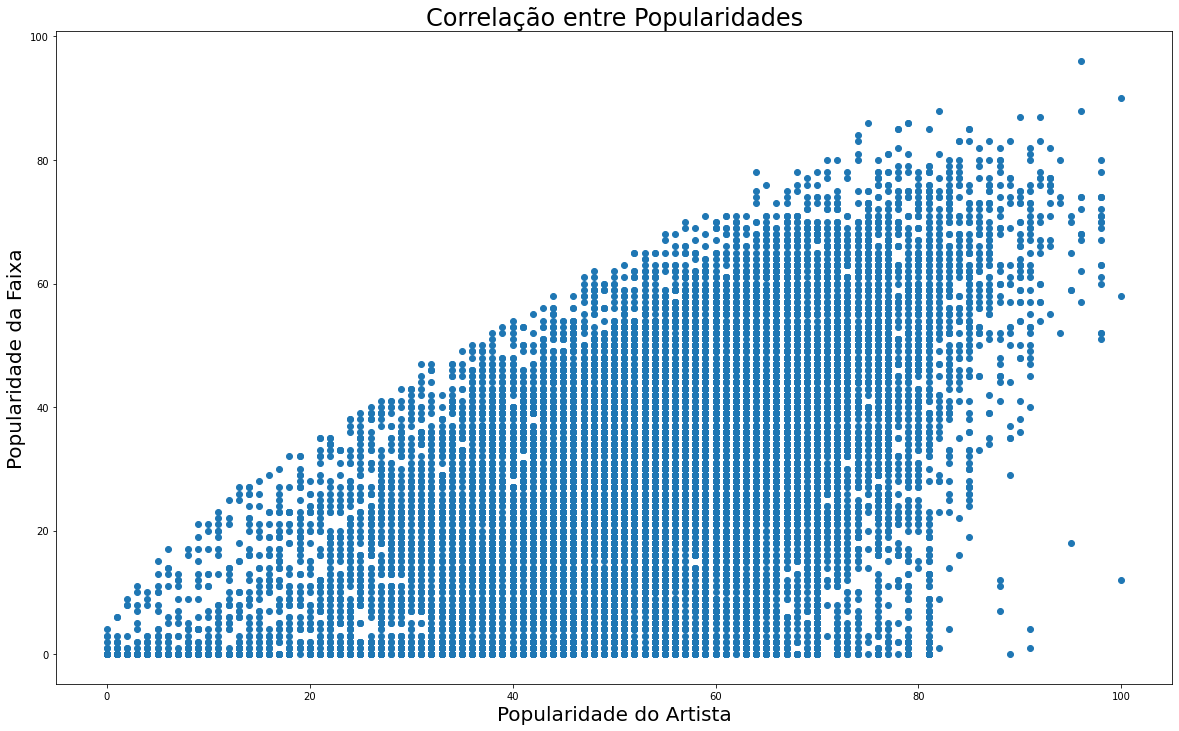

In [ ]:
plt.figure(figsize=(20,12))
plt.scatter(df_merged_sample['popularity_artist'], df_merged_sample['popularity_track'])

plt.title('Correlação entre Popularidades', fontsize=24)
plt.xlabel('Popularidade do Artista', fontsize=20)
plt.ylabel('Popularidade da Faixa', fontsize=20);

In [ ]:
# Artistas e Canções de Alta Popularidade

df_merged.loc[(df_merged['popularity_artist'] >= 90) & (df_merged['popularity_track'] >= 90),
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,
34+35,91,Ariana Grande,95.0
Anyone,90,Justin Bieber,100.0
Baila Conmigo (with Rauw Alejandro),90,Rauw Alejandro,93.0
Bandido,94,Myke Towers,95.0
Beautiful Mistakes (feat. Megan Thee Stallion),90,Maroon 5,91.0


In [ ]:
# Artistas de Alta Popularidade com Canções de Baixa Popularidade

df_merged.loc[(df_merged['popularity_artist'] >= 90) & (df_merged['popularity_track'] == 0),
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,
4x,0,DaBaby,93.0
Baila Conmigo,0,Rauw Alejandro,93.0
Be Alright,0,Justin Bieber,100.0
Beautiful Goodbye,0,Maroon 5,91.0
Catching Feelings,0,Justin Bieber,100.0


In [ ]:
# Artistas e Canções de Baixa Popularidade

df_merged.loc[(df_merged['popularity_artist'] == 0) & (df_merged['popularity_track'] == 0), 
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,
"""Anne-Marie Stretter, Lol V. Stein...""",0,Jean Marc Turine,0.0
"""Je suis née en Indochine""",0,Jean Marc Turine,0.0
"""L'Immoraliste""",0,André Gide,0.0
"""Les Faux-monnayeurs"": Composition...",0,André Gide,0.0
"""Les nourritures terrestres""",0,André Gide,0.0


In [ ]:
# Artistas de Baixa Popularidade com Canções de Alta Popularidade

df_merged.loc[(df_merged['popularity_artist'] == 0) & (df_merged['popularity_track'] >= 70), 
              ['track', 'popularity_track', 'artist', 'popularity_artist']].groupby("track").first().head()

,popularity_track,artist,popularity_artist
track,,,


**Conclusões II:**

4.   Existem artistas de alta popularidade com canções de baixa - e alta! - popularidades
5.   O contrário, porém, não é verdadeiro, pois, artistas de baixa popularidade só possuem canções de baixa popularidade






IMPORTANTE!

*   Devem ser levados em consideração, os artistas sem Gênero (not specified), assim como as faixas sem artistas (em ambos os casos não teremos o Gênero especificado)
*   A partir deste ponto, temos os DataFrames originais, bem como o *df_merged*, usado p/ fazer correlações
*   O *df_merged* será usado para construção do modelo
*   Para análise das features individualmente, continuaremos usando os DataFrame originais


# - track duration_ms : duração da música em milissegundos

IDENTIFICANDO OS OUTLIERS

In [ ]:
duration_timestamp = pd.to_datetime(df_tracks['duration_ms'], unit='ms')

In [ ]:
duration_timestamp.describe(datetime_is_numeric=True)

count                           496175
mean     1970-01-01 00:03:52.370966322
min                1970-01-01 00:00:04
25%         1970-01-01 00:02:56.933000
50%         1970-01-01 00:03:35.640000
75%         1970-01-01 00:04:24.200000
max         1970-01-01 01:33:41.218000
Name: duration_ms, dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


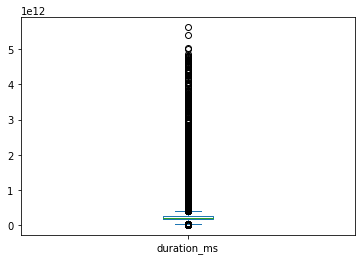

In [ ]:
duration_timestamp.astype(int).plot.box()

In [ ]:
df_tracks.loc[df_tracks['duration_ms'] == df_tracks['duration_ms'].min()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,[Louis Armstrong],[19eLuQmk9aCobbVDHc6eek],1925,0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_tracks.loc[df_tracks['duration_ms'] == df_tracks['duration_ms'].max()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
326329,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,5621218,0,[ท่านพุทธทาส],[2ySk9zib3PuomvMGmCqdTA],1979-07-28,0.638,0.537,8,-13.365,1,0.775,0.825,0.0,0.345,0.401,131.446,3


In [ ]:
# Faixas com menos de 1 minuto de duração

df_tracks.loc[df_tracks['duration_ms'] < 60000].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
106,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.657,0.3250,10,-14.319,0,0.2540,0.1990,0.856000,0.0931,0.105,81.944,5
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,[Louis Armstrong],[19eLuQmk9aCobbVDHc6eek],1925,0.000,0.0000,0,-60.000,0,0.0000,0.0000,0.000000,0.0000,0.000,0.000,0
2777,6Gb9wRpZp6p0VYuMBxuFHH,Past Ice and Ice and Even More,0,51149,0,[Future Rapper],[2la3t6tT3UzEJaENsqudLP],1926-10-03,0.151,0.2790,1,-7.713,1,0.0340,0.0068,0.000066,0.1880,0.461,81.184,4
4170,1IW9ryxKdvWxINpv4SwhEr,"Kinderszenen, Op. 15: IV. Bittendes Kind",0,56507,0,"[Robert Schumann, Vladimir Horowitz]","[2UqjDAXnDxejEyE0CzfUrZ, 4Ws5hSoABAwvGJ4LhHwHgq]",1928,0.386,0.0076,2,-30.032,1,0.0422,0.9960,0.883000,0.1400,0.609,76.125,1
4191,1UOb4CrTEjQZAqD74HCFMJ,"Preludes: Op. 11, No. 14 in E-Flat Minor",0,57333,0,"[Alexander Scriabin, Vladimir Horowitz]","[6nZiWg5ZB511S24WmB7TCV, 4Ws5hSoABAwvGJ4LhHwHgq]",1928,0.316,0.3880,8,-14.338,0,0.0380,0.9930,0.912000,0.1230,0.456,79.385,4


In [ ]:
len(df_tracks.loc[df_tracks['duration_ms'] < 60000])

5247

In [ ]:
# Faixas acima de 20 minutos de duração

df_tracks.loc[df_tracks['duration_ms'] > 1200000].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1127,2Pu2Hv2NnitI7yxc3rHQzf,Death and Transfiguration,0,1335000,0,"[Richard Strauss, Karl Böhm, Staatskapelle Dre...","[6pAwHPeExeUbMd5w7Iny6D, 3fyr5uksidSlLzsUjRIz5...",1924-12-31,0.1080,0.183,7,-16.348,1,0.0348,0.972,0.901,0.1070,0.0369,91.171,3
5408,6pRh92RIJ9I4o1IZo9JCqo,Tod und Verklärung Op. 24,0,1450347,0,"[Richard Strauss, London Philharmonic Orchestra]","[6pAwHPeExeUbMd5w7Iny6D, 3PfJE6ebCbCHeuqO4BfNeA]",1929,0.0965,0.129,7,-16.723,1,0.0375,0.959,0.933,0.0897,0.0338,76.544,3
5525,6Zy82cYdN3x9ktUpQxHydk,"Piano Sonata in B Minor, S. 178",15,1803280,0,"[Franz Liszt, Vladimir Horowitz]","[1385hLNbrnbCJGokfH2ac2, 4Ws5hSoABAwvGJ4LhHwHgq]",1930,0.3100,0.220,6,-16.664,1,0.0428,0.979,0.868,0.1620,0.0634,79.903,4
6596,0bIuxZqqFor0FWIexwWjqh,N'ecoutez Pas Mesdames,0,1856960,0,[Sacha Guitry],[5WxFNZUj28Pvf9fsOivG5F],1931,0.5220,0.240,8,-25.380,1,0.8610,0.766,0.000,0.1060,0.3560,77.297,4
8025,7M2tLKFG4LJEx0rd0NqFAu,Anslag,0,3093226,0,[Portugallien],[18LbUxlDiDSNFm1HREKWqL],1932,0.0644,0.132,3,-37.943,1,0.0583,0.993,0.962,0.1440,0.0357,72.482,4


In [ ]:
len(df_tracks.loc[df_tracks['duration_ms'] > 1200000])

985

**Conclusões:**

1.   A média de duração das músicas do dataset é de 03min50s.
2.   75% das canções possuem até 04min23s.
3.   A faixa de maior duração do dataset possui 01h33min41s, chama-se โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต, que em Português significa "A estrutura daquilo que se chama de Vida", e, na verdade, trata-se de uma palestra
4.   Levando isso em consideração, identificamos que no DataFrame Tracks, também estão relacionadas itens diferentes de música, em formato de faixas (palestras, álbuns inteiros, concertos etc)
5.   Vamos excluir do DataFrame todos os itens que não consideramos músicas, pois levarão a resultados indesejados no futuro modelo
6.   Considerando o atributo de duração individualmente, vamos entender 
como música todos os itens que possuem entre 01 e 20 minutos
7.   Existem 6573 com menos de 1 minuto, e 1024 registros com duração superior a 20 minutos.

EXCLUINDO AS FAIXAS FORA DOS LIMITES ESTABELECIDOS

In [ ]:
df_tracks.drop(df_tracks[df_tracks['duration_ms'] < 60000].index, inplace = True)
df_tracks.drop(df_tracks[df_tracks['duration_ms'] > 1200000].index, inplace = True)

CONVERTENDO A COLUNA DE MILISSEGUNDOS P/ MINUTOS

In [ ]:
df_tracks['duration_ms'] = duration_timestamp.apply(lambda x : x.strftime('%H:%M:%S'))

In [ ]:
df_tracks.rename(columns={'duration_ms' : 'duration'}, inplace = True)

REPLICANDO AS ALTERAÇÕES NO *DF_TRACKS_EXPLODED* E *DF_MERGED*

In [ ]:
df_merged.drop(df_merged[df_merged['duration_ms'] < 60000].index, inplace = True)
df_merged.drop(df_merged[df_merged['duration_ms'] > 1200000].index, inplace = True)

df_tracks_exploded.drop(df_tracks_exploded[df_tracks_exploded['duration_ms'] < 60000].index, inplace = True)
df_tracks_exploded.drop(df_tracks_exploded[df_tracks_exploded['duration_ms'] > 1200000].index, inplace = True)

In [ ]:
duration_timestamp = pd.to_datetime(df_merged['duration_ms'], unit='ms')
df_merged['duration_ms'] = duration_timestamp.apply(lambda x : x.strftime('%H:%M:%S'))

duration_timestamp = pd.to_datetime(df_tracks_exploded['duration_ms'], unit='ms')
df_tracks_exploded['duration_ms'] = duration_timestamp.apply(lambda x : x.strftime('%H:%M:%S'))

In [ ]:
df_merged.rename(columns={'duration_ms' : 'duration'}, inplace = True)
df_tracks_exploded.rename(columns={'duration_ms' : 'duration'}, inplace = True)

# - explicit track : indica se uma música tem conteúdo explícito ou não



*   0 - sem conteúdo explícito
*   1 - com conteúdo explícito



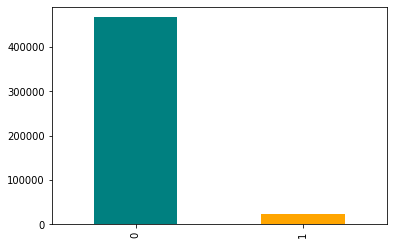

In [ ]:
# Plot das faixas explícitas no DataFrame original, df_tracks

df_tracks['explicit'].value_counts().plot(kind='bar', color=['teal', 'orange'])

In [ ]:
explicit_songs = df_merged.loc[df_merged['explicit'] == 1]

In [ ]:
len(explicit_songs)

108122

In [ ]:
# Os 50 gêneros com mais faixas explícitas

explicit_songs.groupby('genre').size().sort_values(ascending=False).head(50)

genre
rap                    4896
hip hop                4328
pop rap                3165
gangster rap           2473
not specified          2229
trap                   1988
southern hip hop       1813
trap latino            1597
pop                    1458
czsk hip hop           1443
french hip hop         1393
russian hip hop        1354
italian hip hop        1346
hardcore hip hop       1346
dance pop              1317
pop urbaine            1301
reggaeton              1279
east coast hip hop     1168
latin                  1135
latin hip hop           892
german hip hop          848
dutch hip hop           847
west coast rap          824
r&b                     793
rap francais            777
russian trap            769
reggaeton flow          748
alternative metal       734
dirty south rap         703
tropical                671
dutch rap pop           664
greek hip hop           662
atl hip hop             660
polish hip hop          655
urban contemporary      652
rock          

*OBS.: O somatório dentre os gêneros superará a quantidade de faixas totais, pois a consulta por gêneros conta mais de uma vez cada faixa por artista e seu gênero. O ojetivo desta lista não é de apresentar valores exatos, mas sim, de mostrar um overview sobre os gêneros encontrados nas músicas explícitas 


**Conclusões:**

1.   O dataset possui mais de 100.000 músicas com conteúdo explícito
2.   Os gêneros com mais músicas explícitas são rap, hip hop e seus subgêneros



# - track artists : artistas que cantam/participam da faixa

*   A coluna *artists* será removida do DataFrame ***df_merged***, visto que já temos a coluna *artist*, oriunda do DataFrame ***df_artists***, e pode gerar confusão de interpretação



In [ ]:
df_merged.drop(['artists'], axis = 1, inplace = True) 

**Conclusões:**

1.   Observa-se, com ajuda da coluna artists, que ainda possuimos mais itens no DataFrame Tracks que não se tratam de músicas, mas sim, de audiolivros divididos em faixas
2.   Chegamos a esta conclusão ao pesquisar, no próprio Spotify, pelos artistas com maior quantidade de faixas
3.   É provável que hajam, porém, mais faixas de audiolivros além daqueles já encontrados
4.   **IMPORTANTE: construímos abaixo uma estratégia para limpar estes itens do dataset, para evitar que o modelo os leve em consideração**

# - track id_artists : id dos artistas que cantam/participam da faixa

*   A coluna *id_artist* foi usada para segregar o *df_tracks*, pois, para cada faixa do DataFrame, existiam mais de um artista em vários registros

In [ ]:
tracks_id_artists = df_tracks_exploded.groupby('id_artist')

In [ ]:
tracks_id_artists.size().sort_values(ascending=False).head(50)

id_artist
61JrslREXq98hurYL2hYoc    1966
2maQMqxNnlRrBrS1oAsrX9    1946
4NJhFmfw43RLBLjQvxDuRS    1649
5aIqB5nVVvmFsvSdExz408    1442
0gXDpqwYNDODn7fB0RDN8J    1133
2ae6PxICSOZHvjqiCcgon8    1052
003f4bk13c6Q3gAUXv7dGJ    1022
2wOqMjp9TyABvtHdOSOTUS    1015
5as8A4G47Ohu9NSWs3Je8U     982
1JOQXgYdQV2yfrhewqx96o     957
0aFGod7DM6b3O5l1AmvFwK     923
5V0MlUE1Bft0mbLlND7FJz     912
66pXJ6MhX37ZLneiwUWZf3     796
0GF4shudTAFv8ak9eWdd4Y     786
7y97mc3bZRFXzT2szRM4L4     774
7JdPe4gzrYmbcko3FTav57     752
0OzxPXyowUEQ532c9AmHUR     682
1Mxqyy3pSjf8kZZL4QVxS0     630
0bjdfjE8XbLa2Odstu6E1E     608
3gacryguGmpmCvgPGt2CBI     595
43ZHCT0cAZBISjO8DG9PnE     572
3UYZxxxrntUxxEeRycqHvq     568
4eeMulNeqpZGBxybCxZOdC     546
2LmyJyCF5V1eQyvHgJNbTn     522
3gBKY0y3dFFVRqicLnVZYz     514
13dkPjqmbcchm8cXjEJQeP     514
71ADe4Zg9UyE8WQEHbJSXM     503
5LiOoJbxVSAMkBS2fUm3X2     502
5zCaQxjl110XTrm4LQ1CxY     498
7HjbJ8V87zrxkSzL1KieQk     494
6aMD1KAa5i3Myy61cR8FiW     494
4xpgBZSojKNEQqQHXrwSXA     48

*   Observe que o agrupamento entre *artists* gera um resultado diferente daquele feito com base no *id_artists*
*   Isto porque o DataFrame *df_tracks* foi dividido em relação aos ids de artista que estavam em lista, e daí surgiu o *df_tracks_exploded*
*   Assim, no agrupamento feito com base no *id_artists*, estão mencionados separadamente os artistas que eventualmente possuem faixas em comum com algum outro cantor





# - track release_date : data de lançamento da faixa

PADRONIZANDO A COLUNA COM O ANO DE LANÇAMENTO




In [ ]:
release = pd.to_datetime(df_tracks['release_date'])
df_tracks['release_date'] = release.apply(lambda x : x.year)

In [ ]:
df_tracks.rename(columns={'release_date' : 'release_year'}, inplace = True)

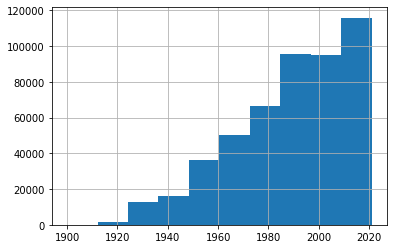

In [ ]:
df_tracks['release_year'].hist()

REPLICANDO AS ALTERAÇÕES NO *DF_TRACKS_EXPLODED* E *DF_MERGED*

In [ ]:
release = pd.to_datetime(df_tracks_exploded['release_date'])
df_tracks_exploded['release_date'] = release.apply(lambda x : x.year)
df_tracks_exploded.rename(columns={'release_date' : 'release_year'}, inplace = True)

In [ ]:
release = pd.to_datetime(df_merged['release_date'])
df_merged['release_date'] = release.apply(lambda x : x.year)
df_merged.rename(columns={'release_date' : 'release_year'}, inplace = True)

DIVIDINDO AS FAIXAS DE ACORDO COM AS DÉCADAS

In [ ]:
decades = range(1920, 2030, 10)

tracks_by_decades = {}
for d in decades:
  years = f'the_{str(d)}s'
  df = df_tracks.loc[(df_tracks["release_year"] >= d) & (df_tracks["release_year"] < ( d+10 ))]
  tracks_by_decades.update({ years : df })

In [ ]:
print(f'*OBS.: Este somatório dentre os gêneros superará a quantidade de faixas totais, pois a busca por gêneros conta mais de uma vez cada faixa por artista e gênero\n')

for years, df in tracks_by_decades.items():
  print(years)

  df_by_genre = df_merged.loc[(df_merged['release_year'] >= df['release_year'].min()) 
                            & (df_merged['release_year'] <= df['release_year'].max())
                            & (df_merged['genre'] != 'not specified')]

  print(f'Possui {len(df)} faixas')
  print(f'Média Popularidade das Faixas: {round(df["popularity"].mean(), 2)}')
  print(f'Gêneros mais comuns: {df_by_genre.groupby("genre").size().sort_values(ascending=False).head(10)} \n\n')  

print(f'*OBS.: Este somatório dentre os gêneros superará a quantidade de faixas totais, pois a busca por gêneros conta mais de uma vez cada faixa por artista e gênero\n')

*OBS.: Este somatório dentre os gêneros superará a quantidade de faixas totais, pois a busca por gêneros conta mais de uma vez cada faixa por artista e gênero

the_1920s
Possui 6428 faixas
Média Popularidade das Faixas: 1.01
Gêneros mais comuns: genre
vintage tango            1577
tango                    1538
vintage jazz             1020
big band                  710
swing                     651
stride                    528
classical                 519
tin pan alley             425
harlem renaissance        371
classical performance     283
dtype: int64 


the_1930s
Possui 11012 faixas
Média Popularidade das Faixas: 1.8
Gêneros mais comuns: genre
big band                 1577
swing                    1553
vintage tango            1426
tango                    1123
classical                1082
stride                    992
vintage jazz              884
vocal jazz                831
adult standards           759
classical performance     665
dtype: int64 


the_1940s
Possui 14662 f

**Conclusões:**


1.   A quantidade de faixas disponíveis no dataset aumentam proporcionalmente conforme a passagem dos anos (as últimas décadas possuem mais registros do que das décadas antigas)
2.   Referente à evolução dos gêneros musicais:


> Nas décadas de 20 e 30 eram mais comuns as músicas de tango;


> Entre os anos 40 e 50, as músicas mais clássicas e o jazz estavam em voga;


> O rock começou a tomar protagonismo nos anos 60, e dominou até os anos 80, começando a dar espaço para outros gêneros a partir dos anos 90


> Nos anos 90, a música latina começou a ganhar espaço, e vem em destaque até os dias atuais


> A partir dos anos 2000, o dance pop começou a se destacar, e até hoje ocupa espaço no pódio da maior quantidade de faixas

### DataFrame Tracks - **audio features**

In [ ]:
audio_features_by_genres = df_merged.groupby('genre')
mean_by_genres = audio_features_by_genres.mean()

In [ ]:
mean_by_genres

,popularity_track,explicit,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,popularity_artist
genre,,,,,,,,,,,,,,,,,
21st century classical,1.000000,0.000000,2016.500000,0.094250,0.018600,2.000000,-30.150500,0.500000,0.040800,0.817000,0.448755,0.220500,0.033300,80.355000,2.500000,838.000000,13.000000
432hz,30.000000,0.000000,2012.000000,0.570667,0.798333,9.333333,-6.146000,0.000000,0.097267,0.011497,0.002401,0.328500,0.389333,133.669667,4.000000,10113.000000,57.000000
48g,37.964286,0.000000,2010.285714,0.477643,0.874500,6.142857,-4.153107,0.821429,0.070771,0.165956,0.039811,0.237889,0.520325,140.892821,4.000000,281411.642857,54.357143
a cappella,31.113402,0.000000,1990.268041,0.548557,0.343656,5.257732,-13.376876,0.680412,0.082580,0.629511,0.014131,0.182685,0.504787,116.059938,3.855670,220348.773196,47.958763
abstract,30.941176,0.000000,1989.764706,0.434365,0.462482,5.235294,-17.141706,0.500000,0.053247,0.403481,0.821783,0.172156,0.257303,121.582382,3.970588,99482.852941,44.235294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zouglou,38.107143,0.000000,1999.500000,0.731357,0.806500,6.107143,-6.259000,0.535714,0.095789,0.137883,0.058257,0.169164,0.852571,125.656929,4.035714,73105.928571,43.750000
zouk,31.005848,0.029240,1997.479532,0.700053,0.736117,5.298246,-9.119526,0.614035,0.059963,0.187422,0.094023,0.143051,0.799158,122.217474,4.000000,19086.847953,38.058480
zouk riddim,39.246753,0.090909,2006.974026,0.669831,0.718325,5.298701,-7.499247,0.610390,0.102613,0.239184,0.040493,0.158104,0.643468,131.007468,4.064935,43136.194805,42.324675


# - track danceability : indica o quão dançante é uma faixa

*   Valores variam entre 0.0 até 1.0
*   Baseado em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, intensidade da batida e regularidade geral



ANÁLISE DE OUTLIERS

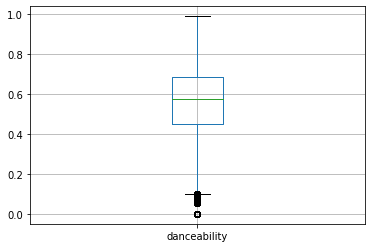

In [ ]:
df_tracks.boxplot(column=['danceability'])

In [ ]:
q1 = df_tracks['danceability'].quantile(0.25)
q3 = df_tracks['danceability'].quantile(0.75)

IQR = q3 - q1

lower_danceability_outliers = q1 - 1.5 * IQR

*   Não existem outliers acima do limite do 3º quartil


In [ ]:
lower_danceability_outliers

0.10099999999999992

OUTLIERS ABAIXO DO PRIMEIRO QUARTIL

In [ ]:
outliers = df_tracks[df_tracks['danceability'] < lower_danceability_outliers]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
817,2WTtJDfCUjAyCZHRSfCLDn,La Mina del Ford,1,00:02:13,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1924,0.0000,0.0258,5,-24.894,1,0.0000,0.996,0.76800,0.0831,0.0000,0.000,0
1013,5tQsQaMquCXBREb1FNymi7,Oh Mujer Mujer,0,00:02:50,0,[Francisco Canaro],[2maQMqxNnlRrBrS1oAsrX9],1924,0.0000,0.3150,8,-15.969,0,0.0000,0.996,0.95600,0.3750,0.0000,0.000,0
1043,6VweawuAyN9Ad9ikn9f5W3,Shangai Bay,0,00:02:09,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1924,0.0000,0.0829,6,-24.272,1,0.0000,0.996,0.89300,0.1230,0.0000,0.000,0
3773,6XH3KreFXUImbVYPTN0nvT,Tango in B Minor,0,00:02:25,0,[Franz Fedor Alexandros],[7aFE2T8wEVfoLNgjTtUKab],1927,0.0682,0.4480,11,-11.731,0,0.0394,0.837,0.00744,0.1330,0.2470,58.130,5
5492,1a1hj9ASUFcNTC1Fd3xIF4,"From Holberg's Time, Suite for String Orchestr...",0,00:06:27,0,"[Edvard Grieg, RIAS-Symphonie-Orchester, Herbe...","[5ihY290YPGc3aY2xTyx7Gy, 0NZ45pVCulww4G9z09oz4...",1929,0.0912,0.1540,7,-16.669,0,0.0407,0.953,0.85500,0.1310,0.0351,77.509,3


In [ ]:
outliers.shape

(1430, 20)

ANÁLISE DA *DANCEABILITY* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
danceability_by_decades = pd.DataFrame(index=range(len(df_tracks)))

for years, df in tracks_by_decades.items():
  danceability_by_decades[years] = df['danceability']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


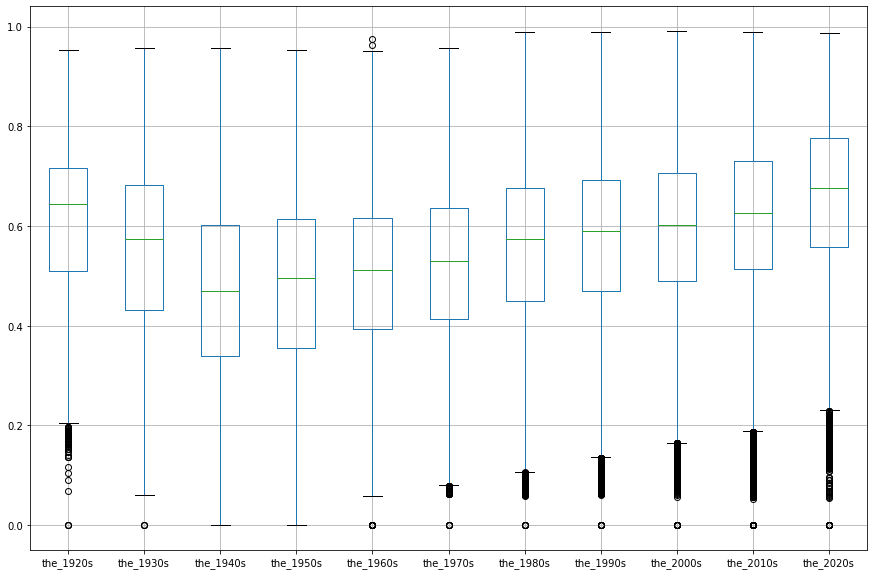

In [ ]:
danceability_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *DANCEABILITY* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
danceability_by_genres = df_merged.groupby('genre').danceability.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *danceability*

In [ ]:
danceability_by_genres.head()

,mean,size
genre,,
spa,0.000000,1
singing bowl,0.056900,1
german contemporary classical,0.079300,1
white noise,0.089046,50
21st century classical,0.094250,2


Gêneros com maiores médias de *danceability*

In [ ]:
danceability_by_genres.tail()

,mean,size
genre,,
boston electronic,0.880,2
alberta hip hop,0.885,1
togolese pop,0.916,1
proto-rap,0.947,1
native american hip hop,0.957,1


*   Como visto acima, danceability tem uma correlação positiva com valence
*   Observaremos esta correlação graficamente



In [ ]:
df_tracks_sample = df_tracks.sample(frac=0.004)

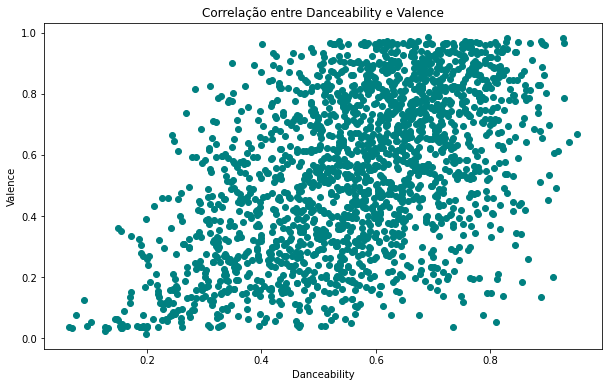

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_tracks_sample['danceability'], df_tracks_sample['valence'], c=['teal'])

plt.title('Correlação entre Danceability e Valence')
plt.xlabel('Danceability')
plt.ylabel('Valence');

**Conclusões:**

1.   A cada década aumenta-se a mediana do *danceability* das faixas
2.   Quanto mais se aumenta a média de *danceability*, porém, aumenta-se também, o número de faixas abaixo do limite inferior [faixas não dançantes]
3.   Existe uma tendência (moderada) de que, quanto maior o *danceability* das faixas, maior é o atributo *valence*
4.   As faixas com a menor mediana de *danceability*, porém, são as faixas da década de 1940 (menor do que nas décadas anteriores, inclusive). Vamos observar, mais adiante, que outros atributos também foram mais baixos nesta década
5.   Concidentemente ou não, neste período ocorreu a Segunda Guerra Mundial (de 1939 a 1945)
*   OBS.:   O período da Primeira Guerra Mundial não está contemplado no dataset (1914 a 1918), para podermos traçar um paralelo entre os dois períodos
6.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de maior média de *danceability* são *rave funk*, *miami bass* e *detroit trap*
7.   Os de menor *danceability* são *white noise*, *sound* e *water*. Olhando apenas pelo nome, provavelmente são faixas instrumentais, com sons e ruídos de fundo









# - track energy : mede a intensidade e atividade da faixa

*   Valores variam entre 0.0 até 1.0
*   As características que contribuem para este atributo incluem: dinâmica da faixa, intensidade percebida, timbre, taxa de início e entropia geral

ANÁLISE DE OUTLIERS

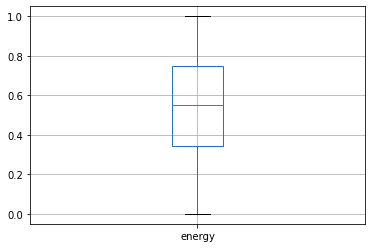

In [ ]:
df_tracks.boxplot(column=['energy'])

*   Não existem outliers neste atributo


ANÁLISE DE *ENERGY* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
energy_by_decades = pd.DataFrame(index=range(len(df_tracks)))

for years, df in tracks_by_decades.items():
  energy_by_decades[years] = df['energy']  

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


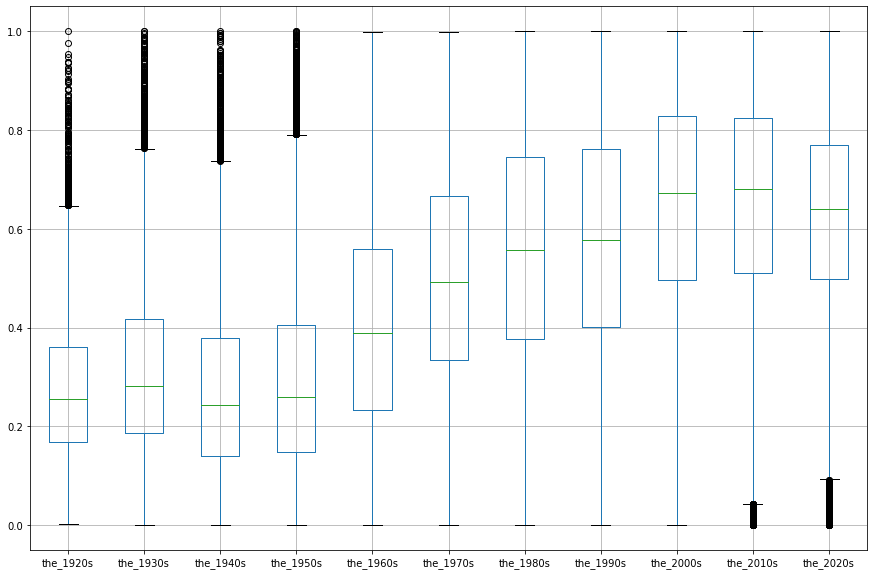

In [ ]:
energy_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *ENERGY* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
energy_by_genres = df_merged.groupby('genre').energy.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *energy*

In [ ]:
energy_by_genres.head()

,mean,size
genre,,
spa,0.000062,1
abstract idm,0.002910,1
singing bowl,0.004130,1
massage,0.004520,1
german contemporary classical,0.007710,1


Gêneros com maiores médias de *energy*

In [ ]:
energy_by_genres.tail()

,mean,size
genre,,
persian hip hop,0.9910,1
acidcore,0.9910,1
singaporean metal,0.9935,2
singaporean punk,0.9935,2
rhythm game,0.9940,2


*   Como visto acima, *energy* tem uma correlação positiva com *loudness* 
*   Observaremos esta correlação graficamente

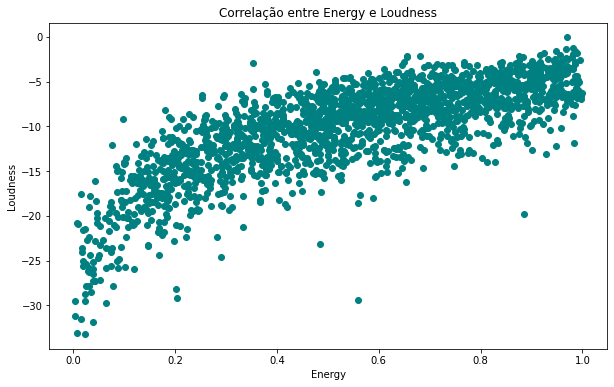

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_tracks_sample['energy'], df_tracks_sample['loudness'], c=['teal'])

plt.title('Correlação entre Energy e Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness');

**Conclusões:**

1.   O atributo *energy* segue uma tendência de aumento conforme o decorrer das décadas
2.   A menor mediana de *energy* ocorre na década de 1940
3.   Existe uma tendência (forte) de que, quanto maior o *energy* das faixas, maior é o atributo *loudness*
4.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de maior média de energy são *buffalo ny metal*, *speedcore*, *frenchcore* e *colombian hardcore*
5.   Os gêneros de menor média de *energy* são *ukrainian choir*, *native american flute* e *baltic choir*



# - track key : chave musical à qual cada faixa pertence

*   Números inteiros indicando um valor padrão na notação Pitch Class
*   "Embora não haja um limite superior ou inferior formal para essa sequência, apenas alguns desses tons são audíveis ao ouvido humano" (WIKIPEDIA, Pitch Class)



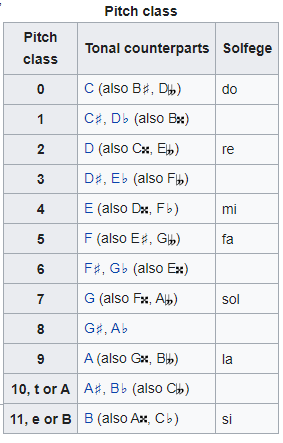

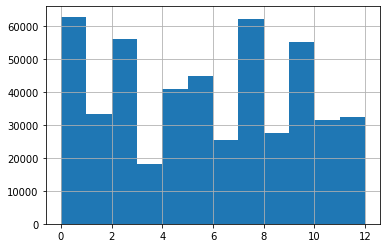

In [ ]:
df_tracks['key'].hist(bins=range(13))

In [ ]:
df_tracks['key'].value_counts()

0     62785
7     62133
2     56057
9     55104
5     44769
4     40785
1     33384
11    32408
10    31436
8     27423
6     25536
3     18123
Name: key, dtype: int64

ANÁLISE DE *KEY* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
key_by_decades = pd.DataFrame(index=range(len(df_tracks)))

for years, df in tracks_by_decades.items():
  key_by_decades[years] = df['key']

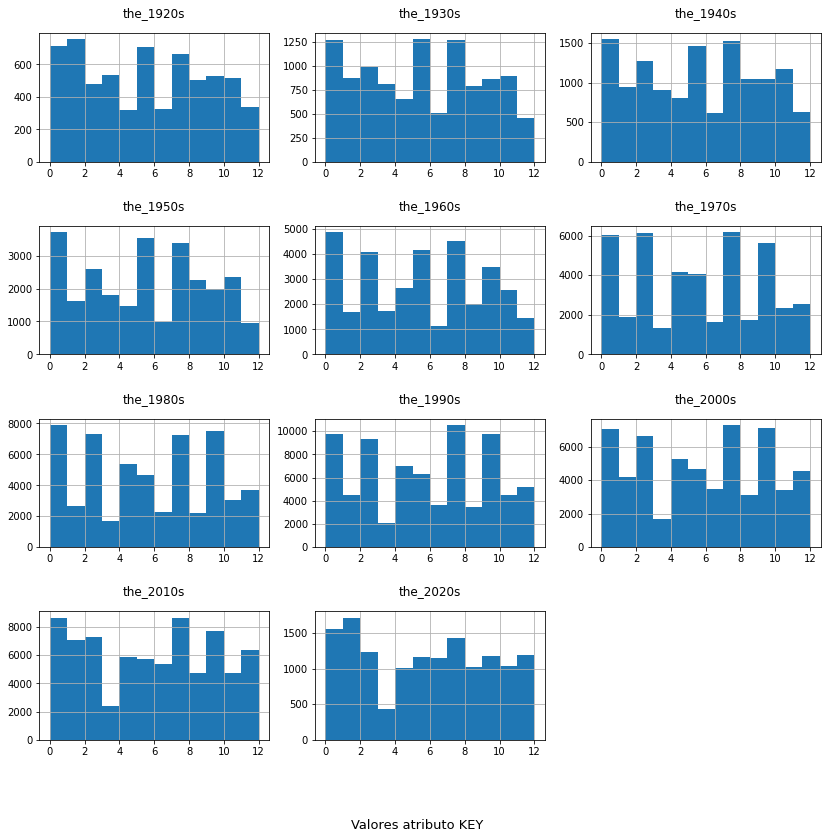

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(14, 13))
plt.subplots_adjust(hspace=0.5)
ax = axs.ravel()

fig.text(0.5, 0.03, 'Valores atributo KEY', ha='center', fontsize=13)

i = 0
for years, df in key_by_decades.items():
  df.hist(bins=range(13), ax=ax[i]).set_title(years, y=1.08)
  i += 1

fig.delaxes(axs[3][2])
plt.show()

ANÁLISE DE *KEY* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
key_by_genres = df_merged.groupby('genre').key.value_counts().sort_values()

Gêneros com menores agrupamentos de *key*

In [ ]:
key_by_genres.head(30)

genre                             key
21st century classical            0      1
icelandic black metal             3      1
icelandic classical               6      1
icelandic experimental            4      1
                                  8      1
                                  11     1
icelandic metal                   3      1
                                  6      1
                                  8      1
icelandic traditional             1      1
                                  10     1
idaho indie                       0      1
                                  4      1
                                  5      1
                                  11     1
idol                              6      1
                                  7      1
                                  11     1
idol rock                         10     1
igbo traditional                  3      1
icelandic black metal             2      1
igbo traditional                  5      1
hypnosis mic    

Gêneros com maiores agrupamentos de *key*

In [ ]:
key_by_genres.tail(30)

genre            key
classic rock     0       2206
rock             4       2284
classic rock     7       2322
classical        0       2323
                 7       2343
filmi            5       2355
                 2       2427
classical        2       2445
classic rock     2       2495
                 9       2557
rock             0       2693
adult standards  7       2785
rock             7       2834
adult standards  5       2845
filmi            7       2969
rock             2       3074
adult standards  0       3252
rock             9       3317
not specified    6       3982
                 3       4426
                 11      4704
                 8       5213
                 4       5765
                 10      5840
                 1       6300
                 9       7427
                 5       8199
                 2       8411
                 7       9784
                 0      10692
Name: key, dtype: int64

**Conclusões:**

1.   Os níveis 0 [DÓ], 2 [RÉ], 7 [SOL] e 9 [LÁ] foram preponderantes em todas as décadas, de forma parecida
2.   Quanto à divisão por gêneros, aparentemente não há tendência definida; existem maiores agrupamentos nas canções de rock, e menores no gênero indie e seus derivados, mas isso se deve mais ao fato da quantidade de faixas no dataset p/ cada gênero em si, do que devido ao atributo *key*



# - track loudness :  volume geral de uma faixa medido em decibéis (dB)

*   Valores geralmente variam entre -60 e 0 db.

ANÁLISE DE OUTLIERS

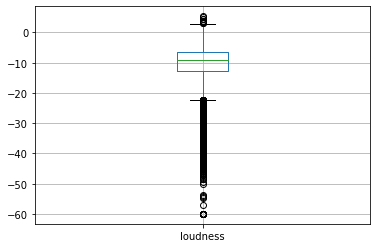

In [ ]:
df_tracks.boxplot(column=['loudness'])

In [ ]:
q1 = df_tracks['loudness'].quantile(0.25)
q3 = df_tracks['loudness'].quantile(0.75)

IQR = q3 - q1


lower_loudness_outliers = q1 - 1.5 * IQR
higher_loudness_outliers = q3 + 1.5 * IQR

*   Existem outliers tanto acima, quanto abaixo dos limites dos quartis



OUTLIERS ABAIXO DO PRIMEIRO QUARTIL

In [ ]:
lower_loudness_outliers

-22.294

*   OBS.: Neste caso, vamos considerar como outliers de limite inferior, todos 
aqueles com valor abaixo de -60, devido à natureza do atributo

In [ ]:
outliers = df_tracks[df_tracks['loudness'] < -60.0]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [ ]:
outliers.shape

(0, 20)

OUTLIERS ACIMA DO TERCEIRO QUARTIL

In [ ]:
higher_loudness_outliers

3.082

*   OBS.: Neste caso, vamos considerar como outliers de limite superior, todos aqueles com valor acima de 0, devido à natureza do atributo

In [ ]:
outliers = df_tracks[df_tracks['loudness'] > 0.0]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
10869,050FXMyCrQJG01AT55Jvk1,Sold,0,00:02:32,0,[Apocolothoth],[5YRGJurHafkpJKCRDZrRtP],1936,0.000,0.114,0,3.855,0,0.0000,0.000047,0.998000,0.5780,0.0000,0.000,0
18301,5a1zE4Pl5Y0pEMstZMJlBH,drag,0,00:03:28,0,[DYING SPASM],[7EkuekiTt0lwIjTLKBoON3],1944,0.316,0.529,11,1.830,0,0.1390,0.024300,0.704000,0.1110,0.0368,99.418,5
31716,4VEyXU24FiXNeanFm1FMgm,Suzie Q.,35,00:02:16,0,[Dale Hawkins],[7kcPzHlsyJm5tDv7JMcr6T],1958,0.431,0.898,9,0.439,1,0.0904,0.636000,0.000073,0.3230,0.8420,143.177,4
32527,2yOXKIU9YtBSWjI3OA8tqj,Little Bitty Pretty One,57,00:02:23,0,[Thurston Harris],[61VpPyyJn2bitby8tbafzT],1959,0.706,0.883,8,1.085,1,0.2400,0.777000,0.000002,0.0562,0.8870,88.351,4
32967,60ZK0nnSbOQDZdCufMwps6,Hey Baba Leba,27,00:02:27,0,[Thurston Harris],[61VpPyyJn2bitby8tbafzT],1959,0.555,0.958,5,2.087,0,0.0492,0.896000,0.033600,0.1110,0.9660,98.295,4


In [ ]:
outliers.shape

(194, 20)

ANÁLISE DE *LOUDNESS* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
loudness_by_decades = pd.DataFrame(index=range(len(df_tracks)))

for years, df in tracks_by_decades.items():
  loudness_by_decades[years] = df['loudness']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


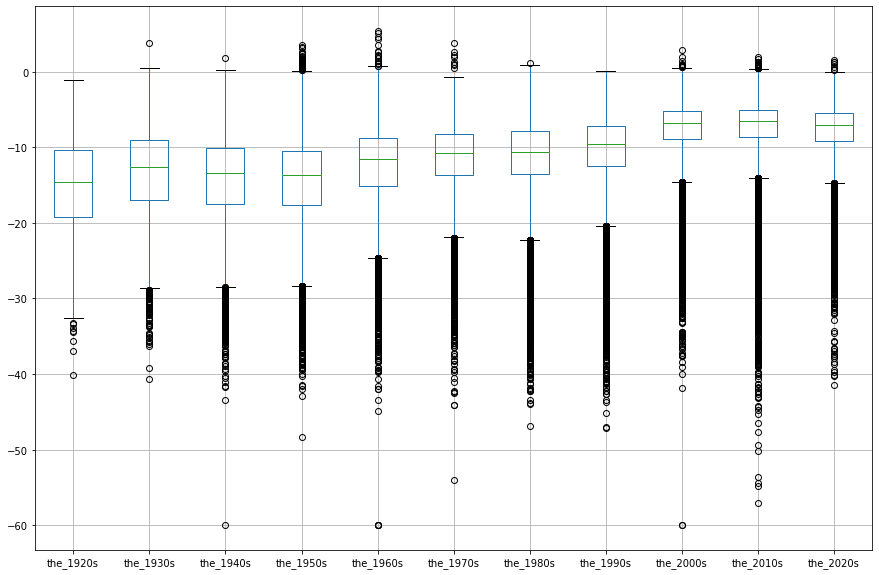

In [ ]:
loudness_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *LOUDNESS* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
loudness_by_genres = df_merged.groupby('genre').loudness.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *loudness*

In [ ]:
loudness_by_genres.head()

,mean,size
genre,,
welsh choir,-42.1370,1
abstract idm,-37.5180,1
caucasian classical piano,-36.2520,1
korean classical piano,-35.5040,4
binaural,-35.0846,5


Gêneros com maiores médias de *loudness*

In [ ]:
loudness_by_genres.tail()

,mean,size
genre,,
mainland se asia metal,-1.4900,1
belgian dnb,-0.5510,2
aikatsu,0.2390,1
singaporean metal,2.3895,2
singaporean punk,2.3895,2


**Conclusões:**

1.   Temos 194 faixas com volume maior que 0 dB, e nenhuma com menos de -60dB
2.   As faixas da década de 1930 possuem, na mediana, o *loudness* maior que seus contemporâneos
3.   *Loudness* é um atributo que tende a aumentar com o passar das décadas, porém, quanto mais se aumenta a mediana deste atributo, aumenta-se, também, a 'cauda' de outliers abaixo do limite inferior
4.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de maior média de *loudness* são *japanese metalcore*, *yaoi* e *speedcore*
5.   Os gêneros de menor média são *ukrainian choir*, *orthodox chant* e *native american flute*





# - track mode : modo da faixa (maior ou menor)

*   0 - modo (acorde) menor
*   1 - modo (acorde) maior

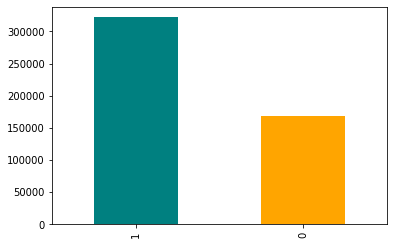

In [ ]:
df_tracks['mode'].value_counts().plot(kind='bar', color=['teal', 'orange'])

In [ ]:
df_tracks['mode'].value_counts()

1    321716
0    168227
Name: mode, dtype: int64

ANÁLISE DE *MODE* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
mode_by_decades = pd.DataFrame(index=range(len(df_tracks)))

for years, df in tracks_by_decades.items():
  mode_by_decades[years] = df['mode']

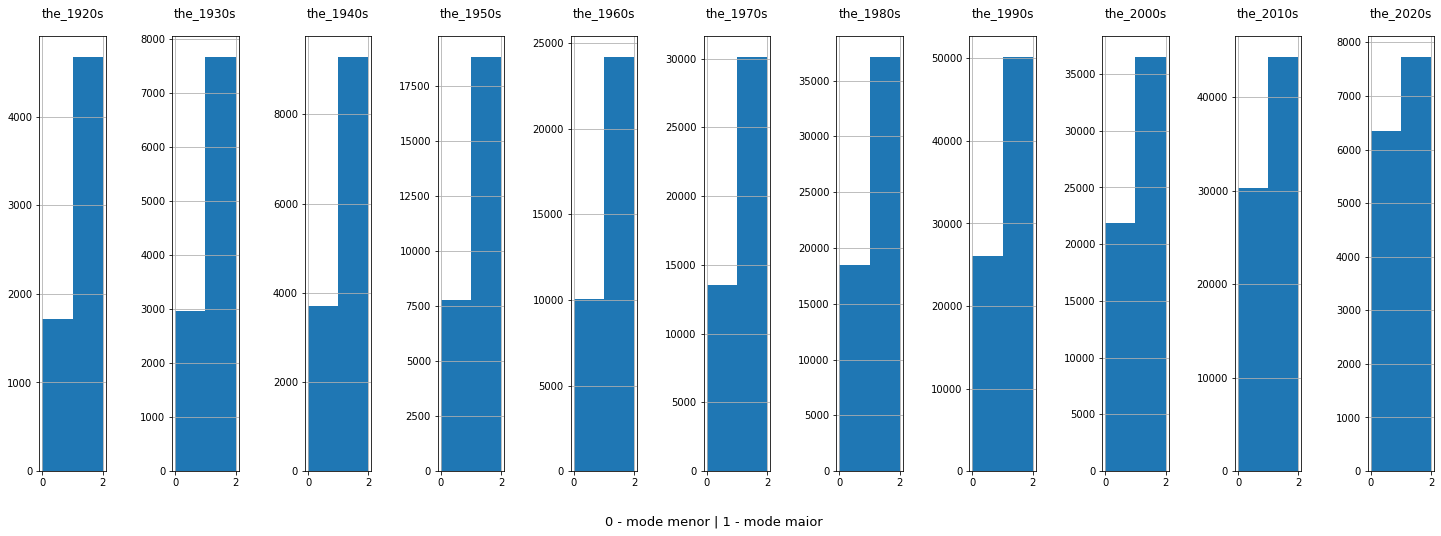

In [ ]:
fig, axs = plt.subplots(1, 11, figsize=(25, 8))
plt.subplots_adjust(wspace=1.0)
ax = axs.ravel()

fig.text(0.5, 0.03, '0 - mode menor | 1 - mode maior', ha='center', fontsize=13)

i = 0
for years, df in mode_by_decades.items():
  df.hist(bins=range(3), ax=ax[i]).set_title(years, y=1.03)
  i += 1

plt.show()

ANÁLISE DE *MODE* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
menor_mode_by_genres = df_merged[df_merged['mode'] == 0].groupby('genre').size().sort_values(ascending=False)
maior_mode_by_genres = df_merged[df_merged['mode'] == 1].groupby('genre').size().sort_values(ascending=False)

Gêneros com mais faixas de *mode* menor

In [ ]:
menor_mode_by_genres.head(10)

genre
not specified            25988
filmi                     9456
rock                      5660
classical                 5247
adult standards           5236
desi pop                  5085
sufi                      5054
latin                     4535
classic bollywood         4436
classical performance     3977
dtype: int64

Gêneros com mais faixas de *mode* maior

In [ ]:
maior_mode_by_genres.head(10)

genre
not specified            54755
adult standards          16295
rock                     15427
filmi                    13809
classical                13568
classic rock             12131
mellow gold              11210
classical performance    10768
folk rock                 9673
soft rock                 9485
dtype: int64

**Conclusões:**


1.   Em todas as décadas, foram lançadas mais faixas de modo (acorde) maior, do que menor
2.   Os gêneros *rock* e *classic rock* estão tanto entre os que mais têm faixas de acorde menor, quanto os que mais têm faixas de acorde maior
3.   Músicas de gênero *latin* e *dance pop* também figuram entre os que mais têm faixas de modo menor
4.   Enquanto que outros subgêneros do rock estão entre os que mais têm faixas de modo maior, como *soft rock*, *album rock* e *folk rock*


# - track speechiness : o quão 'falada' é uma faixa

*   Valores variam de 0.0 até 1.0, sendo que:
*   Acima de 0,66: faixas que provavelmente são compostas inteiramente de palavras faladas
*   Entre 0,33 e 0,66: faixas que podem conter música e fala,  incluindo casos como música rap
*   Abaixo de 0,33: provavelmente representam música e outras faixas não semelhantes à fala






EXCLUSÃO DE FAIXAS NÃO MUSICAIS (POR EX.: AUDIOBOOKS)

*   Como identificado anteriormente, temos registros no DataFrame Tracks que são, na verdade, faixas de audiobooks
*   Essas faixas devem ser excluídas dos datasets, pois não é escopo deste projeto gerar playlists para este tipo de artefato
*   Para isso, vamos usar o atributo *speechiness*, excluindo todos aqueles que possuem valor acima de 0,66





In [ ]:
df_tracks = df_tracks[df_tracks['speechiness'] < 0.66]

REPLICANDO A EXCLUSÃO NOS DEMAIS DATAFRAMES

In [ ]:
df_tracks_exploded = df_tracks_exploded[df_tracks_exploded['speechiness'] < 0.66]
df_merged = df_merged[df_merged['speechiness'] < 0.66]

In [ ]:
for yrs in range(1920, 2030, 10):
  years = f'the_{str(yrs)}s'
  tracks_by_decades[years] = tracks_by_decades[years][tracks_by_decades[years].speechiness < 0.66]

ANÁLISE DE OUTLIERS

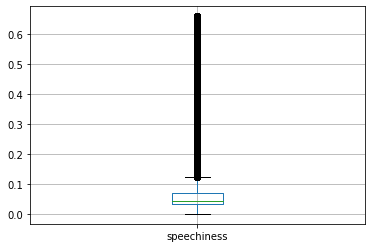

In [ ]:
df_tracks.boxplot(column=['speechiness'])

In [ ]:
q1 = df_tracks['speechiness'].quantile(0.25)
q3 = df_tracks['speechiness'].quantile(0.75)

IQR = q3 - q1

lower_speechiness_outliers = q1 - 1.5 * IQR
higher_speechiness_outliers = q3 + 1.5 * IQR

*   Não existem outliers abaixo do limite do 1º quartil



OUTLIERS ACIMA DO TERCEIRO QUARTIL

In [ ]:
higher_speechiness_outliers

0.12210000000000001

In [ ]:
outliers = df_tracks[df_tracks['speechiness'] > higher_speechiness_outliers]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,00:02:06,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.645,0.4450,0,-13.338,1,0.451,0.674,0.744000,0.151,0.127,104.851,3
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,00:02:14,0,[Francis Marty],[2nuMRGzeJ5jJEKlfS7rZ0W],1922,0.510,0.3550,4,-12.833,1,0.124,0.965,0.000000,0.155,0.727,85.754,5
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro,0,00:03:01,0,[Ignacio Corsini],[5LiOoJbxVSAMkBS2fUm3X2],1922,0.548,0.0391,6,-23.228,1,0.153,0.996,0.933000,0.148,0.612,75.595,3
12,0PH9AACae1f957JAavhOl2,Lazy Boi,0,00:02:37,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.298,0.4600,1,-18.645,1,0.453,0.521,0.856000,0.436,0.402,87.921,4
13,0QiT0Oo5QdLXdFw6RDOj7h,Tu Verras Montmartre,1,00:03:06,0,[Lucien Boyer],[4mSouLpNSEY1d7OdIjlFiP],1922,0.703,0.2800,0,-15.390,1,0.174,0.995,0.000068,0.163,0.897,127.531,4


In [ ]:
outliers.shape

(59998, 20)

ANÁLISE DO *SPEECHINESS* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
speechiness_by_decades = pd.DataFrame(index=range(len(df_tracks)))

In [ ]:
for years, df in tracks_by_decades.items():
  speechiness_by_decades[years] = df['speechiness']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


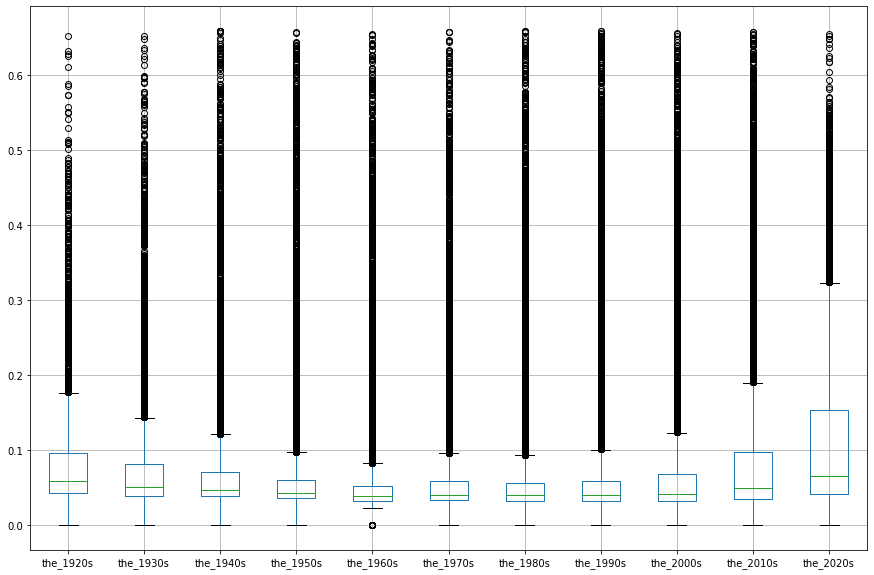

In [ ]:
speechiness_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *SPEECHINESS* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
speechiness_by_genres = df_merged.groupby('genre').speechiness.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *speechiness*

In [ ]:
speechiness_by_genres.head()

,mean,size
genre,,
spa,0.0000,1
modern jangle pop,0.0255,1
fort worth indie,0.0255,2
lowercase,0.0260,1
german shoegaze,0.0260,1


Gêneros com maiores médias de *speechiness*

In [ ]:
speechiness_by_genres.tail()

,mean,size
genre,,
maracatu,0.4520,1
rap nortista,0.4530,1
piada,0.5165,2
comedia,0.5502,10
baithak gana,0.6290,1


**Conclusões:**


1.   Dos anos 1920 até 1960, houve uma queda na média de *speechiness* das faixas, isto é, com o passar do tempo, as músicas foram ficando menos faladas
2.   Apartir a década de 1960, porém, houve uma inversão nesta característica, e, na década de 2020 temos a maior média em valor de *speechiness* entre todos os períodos
3.   Isso levanta um questionamento, pois, músicas muito faladas não estão, necessariamente, "em voga". O que pode caracterizar que ainda existe uma quantidade considerável de faixas não musicais no dataset
4.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, os gêneros de maior média de *speechiness* são *beat poetry*, *poetry*, *reading* e *comedia*
5.   Assim sendo, observamos que ainda temos registros em nosso dataset que se tratam, na verdade, de faixas faladas, e que não foram excluídas anteriormente
6.   Faremos uma combinação destas faixas ainda presentes (*speechiness* abaixo de 0.66) com outros atributos, como, por exemplo, *acousticness*, para descartar mais faixas faladas (gênero comédia, poesia, etc)
7.   Os gêneros de menor média de *speechiness* são *pop minang*, *trio batak* e *chinese indie pop*

# - track acousticness : medida que indica a probabilidade da faixa ser acústica

*   Valores variam entre 0.0 até 1.0

EXCLUSÃO DE FAIXAS NÃO MUSICAIS (POR EX.: AUDIOBOOKS)

*   Como observamos na relação dos gêneros de maior média de *speechiness*, após a exclusão das faixas cujo tal atributo seja superior a 0.66, ainda temos várias faixas não musicais, como, por exemplo, faixas dos gêneros "*comedia*", "*poetry*" e "*piada*"
*   Como o atributo de *speechiness* (superior a 0.66) não foi suficiente para capturar estes itens, vamos combinar as faixas do segundo nível de *speechiness* (entre 0.33 e 0.66) com o atributo *acousticness*, que também faz alusão a faixas não cantadas (quanto maior seu valor, maiores as chances da faixa ser falada)
*   Já que não temos uma divisão clara para este atributo, assim como tínhamos p/ o anterior, vamos combinar as canções com o 3º quartil de *acousticness* das faixas que temos

In [ ]:
df_tracks['acousticness'].describe()

count    480659.000000
mean          0.446288
std           0.349545
min           0.000000
25%           0.094600
50%           0.411000
75%           0.783000
max           0.996000
Name: acousticness, dtype: float64

In [ ]:
df_tracks = df_tracks.loc[ (df_tracks['speechiness'] < 0.33)  &  (df_tracks['acousticness'] < 0.783) ]

REPLICANDO A EXCLUSÃO NOS DEMAIS DATAFRAMES

In [ ]:
df_tracks_exploded = df_tracks_exploded[ (df_tracks_exploded['speechiness'] < 0.33)  &  (df_tracks_exploded['acousticness'] < 0.783) ]
df_merged = df_merged[ (df_merged['speechiness'] < 0.33)  &  (df_merged['acousticness'] < 0.783) ]

In [ ]:
for yrs in range(1920, 2030, 10):
  years = f'the_{str(yrs)}s'
  tracks_by_decades[years] = tracks_by_decades[years][ (tracks_by_decades[years]['speechiness'] < 0.33)  &  (tracks_by_decades[years]['acousticness'] < 0.783) ]

Até este ponto da análise, retiramos do dataset principal (e dos resultantes) as faixas:

*   Cujo conjunto [nome, artista e gênero] se repete integralmente
*   Cuja duração é menor de 1 minuto
*   Cuja duração é de 20 minutos ou mais
*   Cujo atributo *speechiness* era acima de 0.66
*   Cujo atributo *speechiness* era acima de 0.33, e com *acousticness* maior que 0.786

ANÁLISE DE OUTLIERS

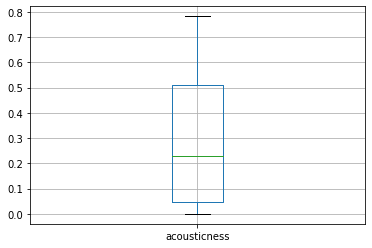

In [ ]:
df_tracks.boxplot(column=['acousticness'])

*   Não existem outliers neste atributo

ANÁLISE DE *ACOUSTICNESS* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
acousticness_by_decades = pd.DataFrame(index=range(len(df_tracks)))

In [ ]:
for years, df in tracks_by_decades.items():
  acousticness_by_decades[years] = df['acousticness']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


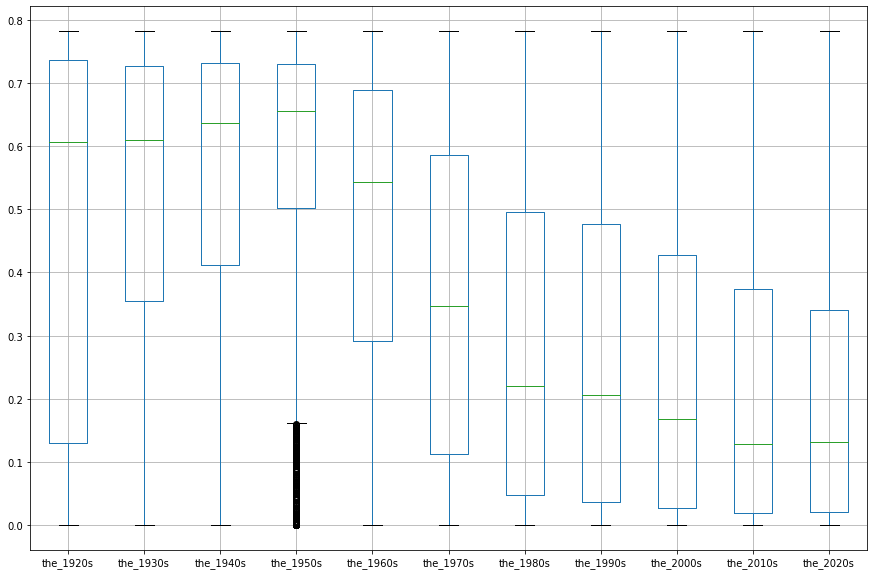

In [ ]:
acousticness_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *ACOUSTICNESS* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
acousticness_by_genres = df_merged.groupby('genre').acousticness.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *acousticness*

In [ ]:
acousticness_by_genres.head()

,mean,size
genre,,
irish experimental electronic,0.000001,1
binaural,0.000003,1
brain waves,0.000003,1
grisly death metal,0.000004,1
quebec death metal,0.000005,2


Gêneros com maiores médias de *acousticness*

In [ ]:
acousticness_by_genres.tail()

,mean,size
genre,,
sarod,0.779,1
vintage classical singing,0.779,1
demoscene,0.780,1
brass quintet,0.781,1
galante era,0.782,1


*   Como visto acima, *acousticness* tem uma correlação negativa com *loudness* e *energy*
*   Observaremos esta correlação graficamente

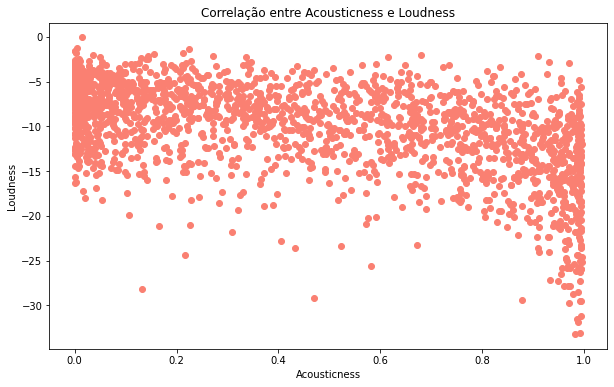

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_tracks_sample['acousticness'], df_tracks_sample['loudness'], c=['salmon'])

plt.title('Correlação entre Acousticness e Loudness')
plt.xlabel('Acousticness')
plt.ylabel('Loudness');

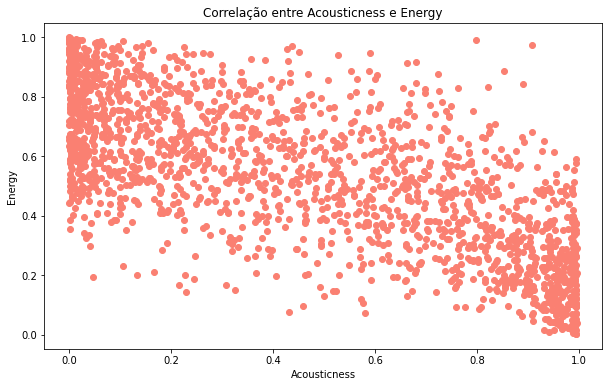

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df_tracks_sample['acousticness'], df_tracks_sample['energy'], c=['salmon'])

plt.title('Correlação entre Acousticness e Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy');

**Conclusões:**

1.   Até a década de 1950, as faixas eram quase sempre acústicas, isto é, com o atributo *acousticness* muito próximo de 1.0, porém, haviam exceções 
2.   A partir da década de 1960, as faixas foram ficando menos acústicas, com valores mais bem distribuídos entre 0.0 e 1.0
3.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de menor média de *acousticness* são *british death metal*, *death n roll*, *technical thrash* e *buffallo ny metal*
4.   Já os gêneros de maior média de *acousticness* são em maioria subgêneros de *classical piano*
5.  Existe uma tendência de que, quanto maior o *acousticness* das faixas, menor é o atributo *energy* 

# - track instrumentalness : medida que indica a probabilidade da faixa ser instrumental

*   Valores variam entre 0.0 até 1.0

ANÁLISE DE OUTLIERS

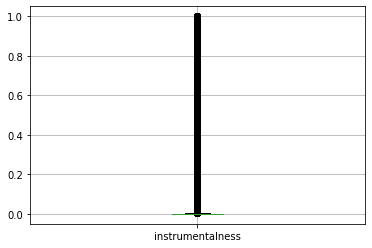

In [ ]:
df_tracks.boxplot(column=['instrumentalness'])

In [ ]:
q1 = df_tracks['instrumentalness'].quantile(0.25)
q3 = df_tracks['instrumentalness'].quantile(0.75)

IQR = q3 - q1

lower_instrumentalness_outliers = q1 - 1.5 * IQR
higher_instrumentalness_outliers = q3 + 1.5 * IQR

*   Não existem outliers abaixo do limite do 1º quartil

OUTLIERS ACIMA DO TERCEIRO QUARTIL

In [ ]:
higher_instrumentalness_outliers

0.00515

In [ ]:
outliers = df_tracks[df_tracks['instrumentalness'] >= higher_instrumentalness_outliers]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,00:05:10,0,[Greg Fieler],[5nWlsH5RDgFuRAiDeOFVmf],1922,0.488,0.475,0,-16.222,0,0.0399,0.620000,0.00645,0.1070,0.544,139.952,4
46,1l1Wk0nOkuMCzioN6l2yfJ,Carol of the Bells,0,00:04:46,0,[Grandcubby Trio],[4XVZpokXbUzg6QeomBANY9],1922,0.382,0.750,10,-11.599,1,0.0742,0.123000,0.75100,0.7250,0.346,149.787,3
112,598LlBn6jpEpVbLjmZPsYV,Graphite,0,00:01:44,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.644,0.684,7,-8.247,1,0.1990,0.144000,0.80200,0.0847,0.138,100.031,4
131,6MD9XSLD4VmVI5SFRPm6By,Car Loans,0,00:02:52,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.651,0.574,10,-11.999,0,0.1040,0.474000,0.71300,0.0597,0.412,99.878,4
403,2l56fKIIrgfHWndcbkBAta,The C00L Song,0,00:02:00,1,[Dampfwalzi],[41GUFwc0gpqt495qHXpxFB],1923,0.503,0.823,9,-12.871,0,0.0640,0.000243,0.64000,0.4730,0.401,97.019,4


In [ ]:
outliers.shape

(75305, 20)


ANÁLISE DE *INSTRUMENTALNESS* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
instrumentalness_by_decades = pd.DataFrame(index=range(len(df_tracks)))

In [ ]:
for years, df in tracks_by_decades.items():
  instrumentalness_by_decades[years] = df['instrumentalness']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


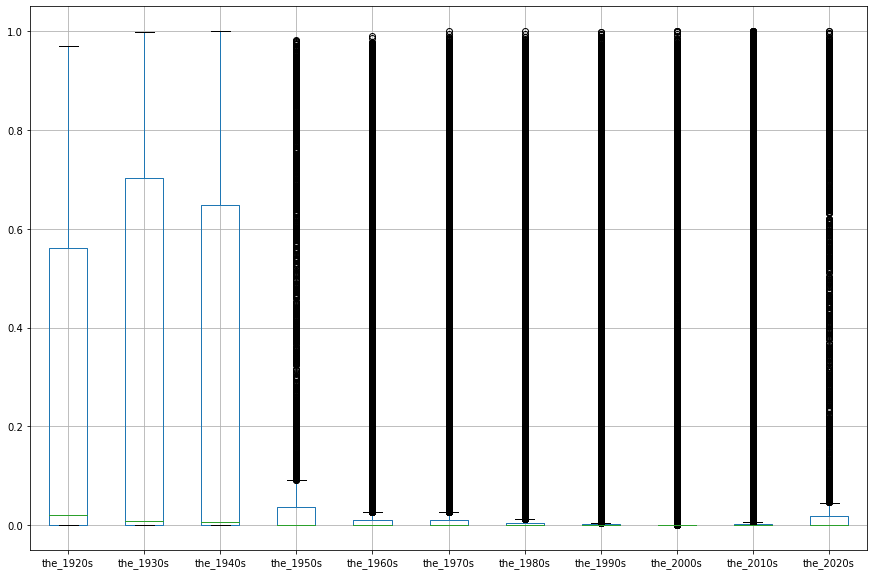

In [ ]:
instrumentalness_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *INSTRUMENTALNESS* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
instrumentalness_by_genres = df_merged.groupby('genre').instrumentalness.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *instrumentalness*

In [ ]:
instrumentalness_by_genres.head()

,mean,size
genre,,
gothic alternative,0.0,1
indie canario,0.0,1
balalaika,0.0,1
indiana hip hop,0.0,3
modern uplift,0.0,2


Gêneros com maiores médias de *instrumentalness*

In [ ]:
instrumentalness_by_genres.tail()

,mean,size
genre,,
organic ambient,0.951,1
musica antigua,0.952,1
celtic harp,0.956,2
british brass band,0.968,1
spa,0.999,1


**Conclusões:**


1.   Até a década de 1940, havia uma considerável distribuição entre faixas de alto e baixo índice de *instrumentalness*
2.   A partir da década de 1950 aumentou-se consideravelmente a concentração das faixas em níveis baixos de *instrumentalness*, contudo, existindo conjuntamente a muitos outliers
3.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de maior média de *instrumentalness* são *focus*, *background piano* e *ancient mediterranean*
4.   Os gêneros de menor média são *detroit trap*, *frevo* e *funk evangelico*



# - track liveness : indica a probabilidade da faixa ser ao vivo, ou não

*   Valores variam entre 0.0 até 1.0
*   Identifica a presença ou ausência de uma platéia



ANÁLISE DE OUTLIERS

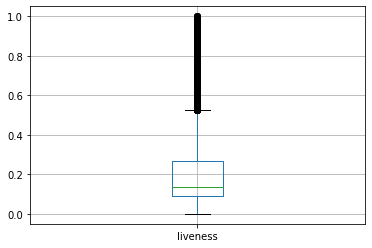

In [ ]:
df_tracks.boxplot(column=['liveness'])

In [ ]:
q1 = df_tracks['liveness'].quantile(0.25)
q3 = df_tracks['liveness'].quantile(0.75)

IQR = q3 - q1

lower_liveness_outliers = q1 - 1.5 * IQR
higher_liveness_outliers = q3 + 1.5 * IQR

*   Não existem outliers abaixo do limite do 1º quartil

OUTLIERS ACIMA DO TERCEIRO QUARTIL

In [ ]:
higher_liveness_outliers

0.52785

In [ ]:
outliers = df_tracks[df_tracks['liveness'] >= higher_liveness_outliers]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
46,1l1Wk0nOkuMCzioN6l2yfJ,Carol of the Bells,0,00:04:46,0,[Grandcubby Trio],[4XVZpokXbUzg6QeomBANY9],1922,0.382,0.750,10,-11.599,1,0.0742,0.123000,0.7510,0.725,0.346,149.787,3
1839,7lTGnqo3hLHbVJNqExZGuE,Liebestraum,4,00:03:26,0,[Tommy Dorsey],[4WoGga7UeRcmjD4ufif4nG],1925,0.496,0.418,5,-9.183,0,0.1970,0.774000,0.6370,0.678,0.735,172.257,4
2033,02R3JMuw0E8uloMBpHG3Yz,Submission Accomplice,0,00:01:18,0,[Future Rapper],[2la3t6tT3UzEJaENsqudLP],1926,0.401,0.610,2,-12.807,1,0.0277,0.031100,0.9700,0.637,0.270,160.240,4
2124,0r5xvEZEjDarFkomOBHjdT,Sati Rawn Tana,0,00:02:25,0,[Future Rapper],[2la3t6tT3UzEJaENsqudLP],1926,0.868,0.626,1,-13.414,1,0.2210,0.035000,0.0502,0.715,0.561,112.532,4
2615,4xe9n6IXfr6Acz6eEogyYT,Strip Down Suit Up,0,00:01:38,0,[Future Rapper],[2la3t6tT3UzEJaENsqudLP],1926,0.719,0.439,9,-9.524,1,0.0637,0.000881,0.6580,0.613,0.401,120.085,4


In [ ]:
outliers.shape

(20864, 20)

ANÁLISE DE *LIVENESS* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
liveness_by_decades = pd.DataFrame(index=range(len(df_tracks)))

In [ ]:
for years, df in tracks_by_decades.items():
  liveness_by_decades[years] = df['liveness']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


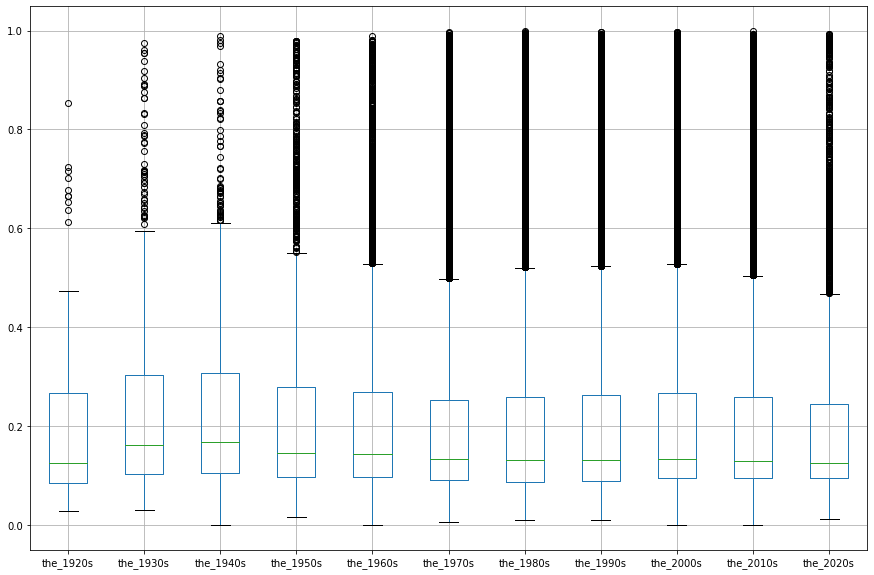

In [ ]:
liveness_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *LIVENESS* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
liveness_by_genres = df_merged.groupby('genre').liveness.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *liveness*

In [ ]:
liveness_by_genres.head()


,mean,size
genre,,
deep smooth r&b,0.0235,1
tulum,0.0338,1
chennai indie,0.0351,1
bangladeshi rock,0.0389,1
bangladeshi indie,0.0389,1



Gêneros com maiores médias de *liveness*

In [ ]:
liveness_by_genres.tail()

,mean,size
genre,,
south carolina metal,0.925,1
new comedy,0.926,1
wind symphony,0.937,1
italian doom metal,0.949,1
comptine africaine,0.955,1


**Conclusões:**

1.   Relativo ao item *livess*, existe uma distribuição comum entre as décadas (tanto da média, quanto do limite dos quartis)
2.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de maior média de *liveness* são *seattle metal*, *traditional ska*, *water* e *environmental*
3.   Os gêneros de menor média são *amapiano*, *vogue* e *brazilian modern jazz*

# - track valence : descreve a positividade transmitida pela faixa

*   Valores variam entre 0.0 até 1.0
*   Alta valência indica faixas que soam mais positivas (por ex.: feliz, alegre, eufórico)
*   Faixas com baixa valência soam mais negativas (por ex.: triste, deprimido, com raiva)

ANÁLISE DE OUTLIERS

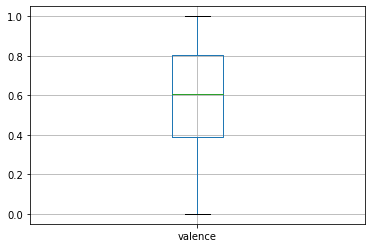

In [ ]:
df_tracks.boxplot(column=['valence'])

*   Não existem outliers neste atributo


ANÁLISE DE *VALENCE* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
valence_by_decades = pd.DataFrame(index=range(len(df_tracks)))

In [ ]:
for years, df in tracks_by_decades.items():
  valence_by_decades[years] = df['valence']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


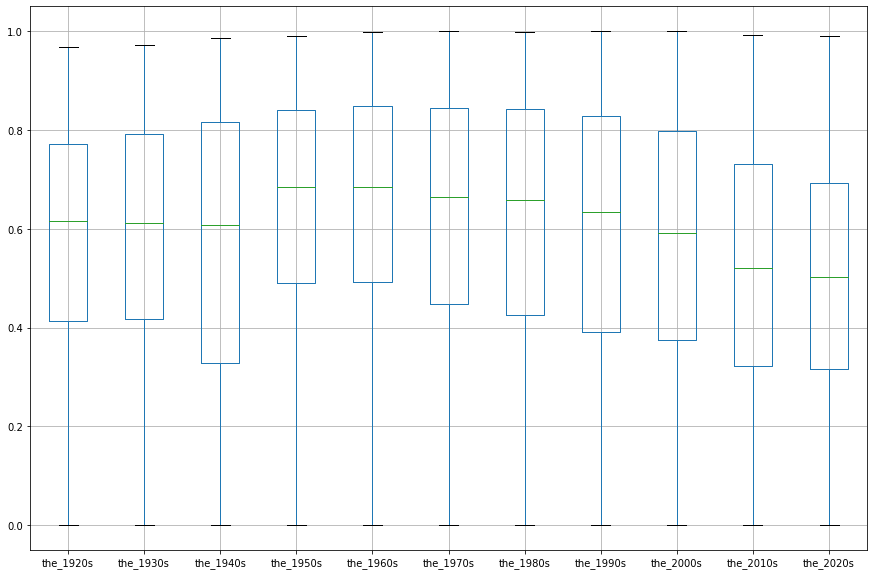

In [ ]:
valence_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *VALENCE* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
valence_by_genres = df_merged.groupby('genre').valence.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *valence*

In [ ]:
valence_by_genres.head()

,mean,size
genre,,
american classical piano,0.000000,1
spa,0.000000,1
neru,0.000010,4
world meditation,0.006370,4
white noise,0.013639,18


Gêneros com maiores médias de *valence*

In [ ]:
valence_by_genres.tail()

,mean,size
genre,,
slovenian folk,0.9705,2
gumbe,0.9710,1
christmas product,0.9720,1
spanish classical piano,0.9748,5
ngoni,0.9760,1


**Conclusões:**

1.   O dataset é composto tanto por faixas de alta positividade, quanto de baixa positividade, sem uma inclinação significativa pra qualquer um dos dois extremos
2.   A mediana, em todas as décadas, gira em torno de 0.6, porém a partir dos anos 2000 ela vem se deslocando pra baixo, isto é, canções de menor positividade vem sendo lançadas desde o início do século
3.   A maior mediana de *valence* ocorreu nas décadas de 1950 e 1960
4.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de menor média de *valence* são *water*, *white noise* e *environmental*, isto é, estilos de musicas mais meditativos
5.   Já os gêneros de maior média de *valence* são *music box*, *piseiro* e *tecnobanda*






# - track tempo : tempo geral estimado de uma faixa, em batidas por minuto (BPM)

*   Valor igual ou maior que 0
*   Velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo



ANÁLISE DE OUTLIERS

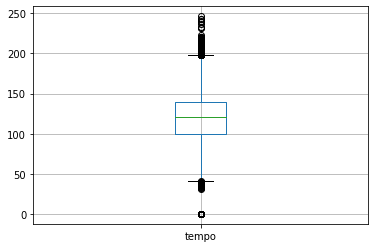

In [ ]:
df_tracks.boxplot(column=['tempo'])

*   Existem outliers tanto acima, quanto abaixo dos limites dos quartis

In [ ]:
q1 = df_tracks['tempo'].quantile(0.25)
q3 = df_tracks['tempo'].quantile(0.75)

IQR = q3 - q1

lower_tempo_outliers = q1 - 1.5 * IQR
higher_tempo_outliers = q3 + 1.5 * IQR

OUTLIERS ABAIXO DO PRIMEIRO QUARTIL

In [ ]:
lower_tempo_outliers

40.87099999999999

In [ ]:
outliers = df_tracks[df_tracks['tempo'] <= lower_tempo_outliers]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8823,6cnAsKhXq5X1BFiDTdSp4W,Prelude and Fugue in G Major BWV 541: II. Fugue,0,00:05:30,0,"[Johann Sebastian Bach, Albert Schweitzer]","[5aIqB5nVVvmFsvSdExz408, 4n3YrsJmeY6qTYJyGwGCRI]",1933,0.0796,0.2700,7,-12.306,1,0.0384,0.735000,0.8270,0.164,0.176,33.944,4
10869,050FXMyCrQJG01AT55Jvk1,Sold,0,00:02:32,0,[Apocolothoth],[5YRGJurHafkpJKCRDZrRtP],1936,0.0000,0.1140,0,3.855,0,0.0000,0.000047,0.9980,0.578,0.000,0.000,0
15304,24mFr4NTDNpYYUtlsfy4Y1,Das Vermächtnis,0,00:02:09,0,[Mathias Wieman],[7lStlBlWQuV8jkY6mjNG9T],1941,0.0000,0.0134,8,-26.028,1,0.0000,0.493000,0.0000,0.504,0.000,0.000,0
18347,6CMBpPcW5HH8VM5mpwCzRS,Suno Suno Tumhen Sunaye,0,00:02:43,0,[K Dutta],[2sOPDx3ICYZJspPHFZNysM],1944,0.0000,1.0000,1,-4.363,1,0.0000,0.202000,0.9990,0.647,0.000,0.000,0
18850,0BEGv9OVHC33uI0jBeWMIZ,"Sonata No. 7 in B-Flat, Op. 83: Allegro inquie...",0,00:08:17,0,"[Sergei Prokofiev, William Kapell]","[4kHtgiRnpmFIV5Tm4BIs8l, 5qsrEqlTIFVbXBB2xd7qoh]",1945,0.0000,0.1290,5,-20.528,0,0.0000,0.773000,0.0988,0.284,0.000,0.000,0


In [ ]:
outliers.shape

(138, 20)

OUTLIERS ACIMA DO TERCEIRO QUARTIL

In [ ]:
higher_tempo_outliers

198.36700000000002

In [ ]:
outliers = df_tracks[df_tracks['tempo'] >= higher_tempo_outliers]

In [ ]:
outliers.head()

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
6143,275EeuRyuxgNJjAhvvVY50,Roll Over Beethoven,0,00:03:11,0,[The Penetraitors],[1T1uvwxmGNuyHOPICU8jB6],1930,0.186,0.963,7,-4.894,1,0.1050,0.0437,0.000000,0.1890,0.514,201.563,4
7020,55R3IoTiGpdcT3w9YXtvy7,Summer Bay,0,00:05:35,0,[Sax Man Mike Clark],[77zGY6H5ikrI96LmBZRcVG],1931,0.334,0.658,2,-6.113,0,0.0348,0.0806,0.866000,0.0748,0.513,199.931,4
7304,2a8JpO3JP8atv9bNuVibHS,Sleigh Ride (with Paula Kelly),8,00:03:01,0,"[Tex Beneke, Ray Eberle, The Modernaires, Paul...","[7e9843xr17L5hRYAti3dtG, 1ZFyAaDK4vvhDg3JeR8Hi...",1932,0.423,0.417,3,-12.682,1,0.0404,0.5940,0.000088,0.3110,0.873,201.613,4
7659,3N4D5t5X6AJZ1vdbszwoC0,Go Santa Oh / Go Daddy oh (medley),0,00:04:11,0,[Cocktail de Nervios],[6OpudeoBfcvBoV0UjfdGCE],1932,0.477,0.370,5,-18.507,0,0.2140,0.3830,0.587000,0.0687,0.722,198.769,4
7773,4d1omCDRzg5p4ajpWjgtBB,Oooh-Dahdily-Dah,2,00:02:19,0,"[Louis Prima, Keely Smith]","[52lBOxCxbJg0ttXEW9CQpW, 0vQqxnQk1G32RtjSAFq3z1]",1932,0.502,0.799,7,-4.375,1,0.1810,0.7750,0.000017,0.2730,0.940,207.370,4


In [ ]:
outliers.shape

(3034, 20)

ANÁLISE DE *TEMPO* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
tempo_by_decades = pd.DataFrame(index=range(len(df_tracks)))

In [ ]:
for years, df in tracks_by_decades.items():
  tempo_by_decades[years] = df['tempo']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


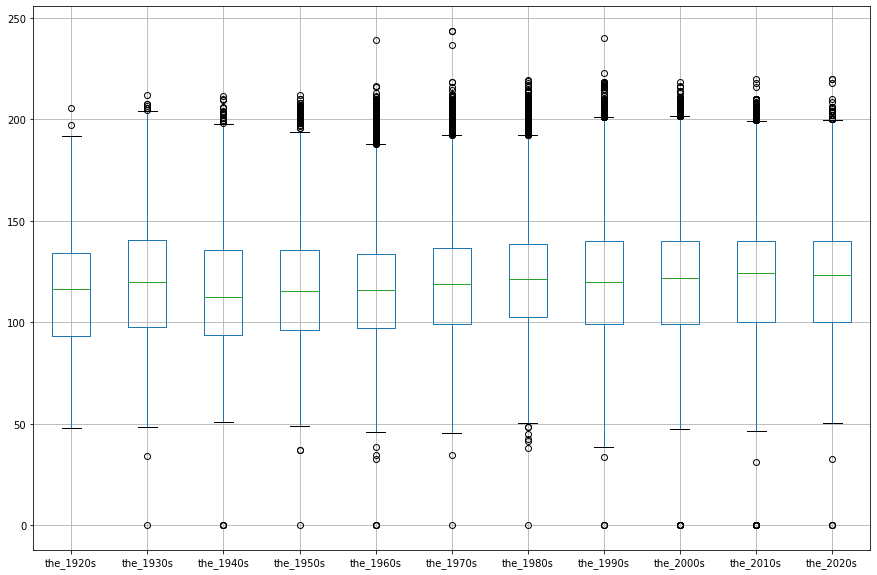

In [ ]:
tempo_by_decades.boxplot(figsize=(15,10))

ANÁLISE DA MÉDIA DE *TEMPO* DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
tempo_by_genres = df_merged.groupby('genre').tempo.agg(['mean', 'size']).sort_values(by=['mean'])

Gêneros com menores médias de *tempo*

In [ ]:
tempo_by_genres.head()

,mean,size
genre,,
american classical piano,0.000000,1
spa,0.000000,1
world meditation,44.441250,4
historic piano performance,50.797500,2
white noise,53.961944,18


Gêneros com maiores médias de *tempo*

In [ ]:
tempo_by_genres.tail()

,mean,size
genre,,
punk mexicano,188.466,1
tijuana indie,189.277,1
kaba gaida,189.315,1
musica piemonteisa,191.704,1
manitoba indie,207.576,1


**Conclusões:**

1.   A mediana das faixas, em todas as décadas, gira em torno de 125 BPM
2.   A década com canções de menor BPM foi, de novo, a década de 1940 
5.   Considerando os gêneros que contém, no mínimo, 10 faixas distintas, aqueles de menor média de *valence* são *sound*, *white noise* e *middle eastern traditional*
6.   Já os gêneros de maior média de *tempo* são *piseiro*, *neurofunk* e *surf punk*

In [ ]:
df_tracks

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,00:05:10,0,[Greg Fieler],[5nWlsH5RDgFuRAiDeOFVmf],1922,0.488,0.475,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.544,139.952,4
46,1l1Wk0nOkuMCzioN6l2yfJ,Carol of the Bells,0,00:04:46,0,[Grandcubby Trio],[4XVZpokXbUzg6QeomBANY9],1922,0.382,0.750,10,-11.599,1,0.0742,0.123,0.751000,0.7250,0.346,149.787,3
51,1v0HtSUeQOu3ba28pvYE5y,Chicago (That Toddlin' Town),0,00:01:51,0,[Jim Chapman],[0DhFxctImIYNNSEHuLQi5U],1922,0.491,0.439,4,-11.356,0,0.1050,0.626,0.000000,0.3210,0.792,180.653,4
112,598LlBn6jpEpVbLjmZPsYV,Graphite,0,00:01:44,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.644,0.684,7,-8.247,1,0.1990,0.144,0.802000,0.0847,0.138,100.031,4
131,6MD9XSLD4VmVI5SFRPm6By,Car Loans,0,00:02:52,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.651,0.574,10,-11.999,0,0.1040,0.474,0.713000,0.0597,0.412,99.878,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586664,1Kzjk1EyngBcP4T8x3fyqv,同行 (新加坡電視劇《愛...沒有距離》主題曲),43,00:03:25,0,[Boon Hui Lu],[6PWJWwEm8BSBFAIAUWlwe4],2020,0.743,0.679,8,-3.952,1,0.0323,0.269,0.000000,0.1330,0.395,126.070,4
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,00:01:46,0,[Emilie Chin],[4USdOnfLczwUglA3TrdHs2],2020,0.626,0.530,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.215,120.113,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,00:02:33,0,[ROLE MODEL],[1dy5WNgIKQU6ezkpZs4y8z],2020,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.686,150.091,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,00:02:22,0,"[Gentle Bones, Clara Benin]","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",2021,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.438,90.029,4


# - track time_signature : compasso geral da faixa

*   Convenção que especifica quantas batidas existem no compasso geral da faixa
*   Não foi encontrada indicação de qual compasso indica cada valor (0, 1, 2, 3, 4 ou 5) do dataset do Spotify
*   Temos, porém, a indicação que o compasso 4/4 ou C é o mais amplamente utilizado na maioria das músicas ocidentais (WIKIPEDIA, Time Signature). Observando os dados, *supomos* que ele se refira ao valor '4' no dataset
*   Para os demais, não foi encontrada fonte que possa identificá-los



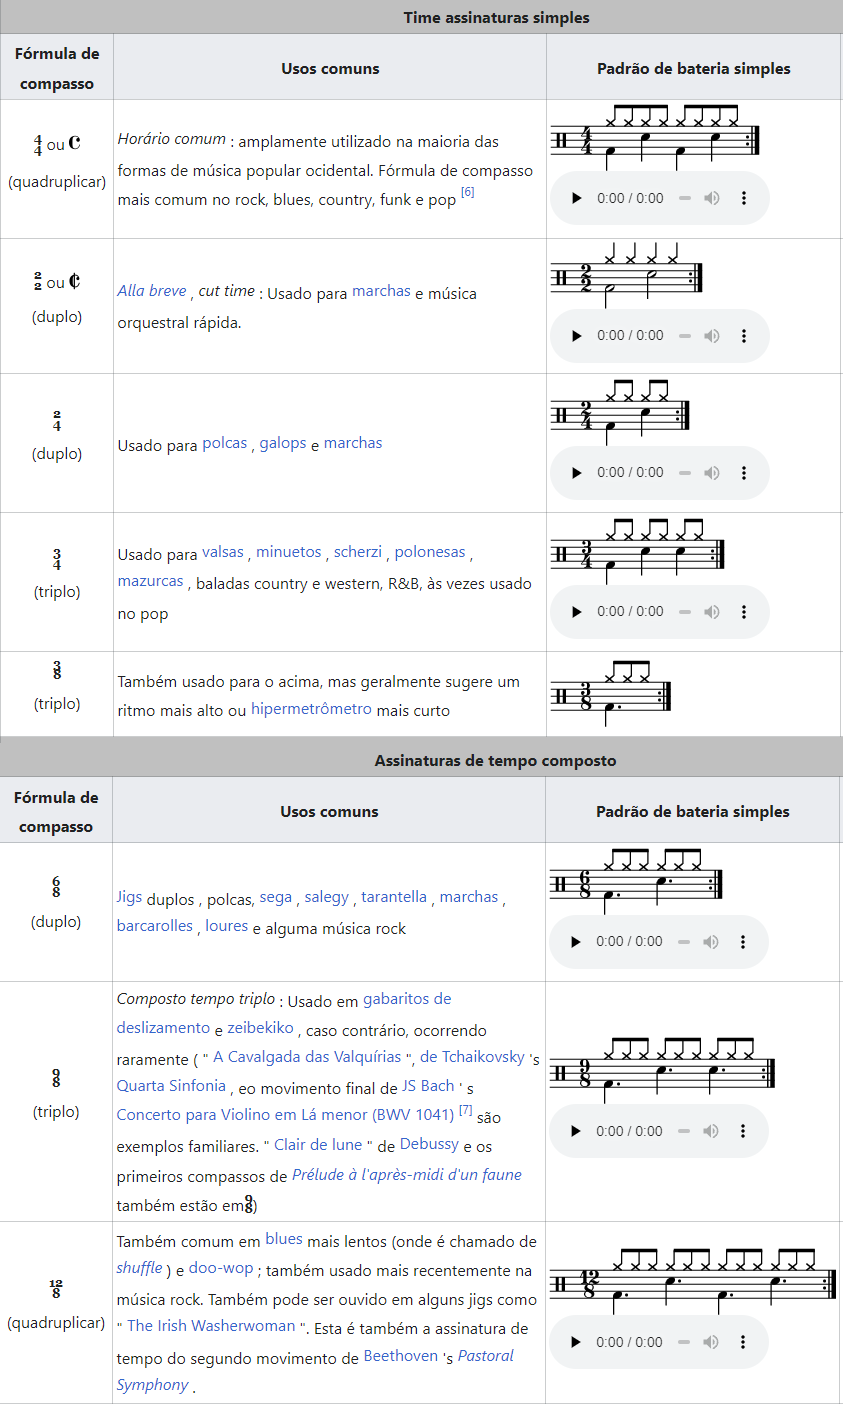

In [ ]:
df_tracks['time_signature'].value_counts()

4    323912
3     23157
5      2441
1      1471
0       120
Name: time_signature, dtype: int64

ANÁLISE DE *TIME SIGNATURE* DE ACORDO COM A PASSAGEM DAS DÉCADAS

In [ ]:
time_signature_by_decades = pd.DataFrame(index=range(len(df_tracks)))

In [ ]:
for years, df in tracks_by_decades.items():
  time_signature_by_decades[years] = df['time_signature']

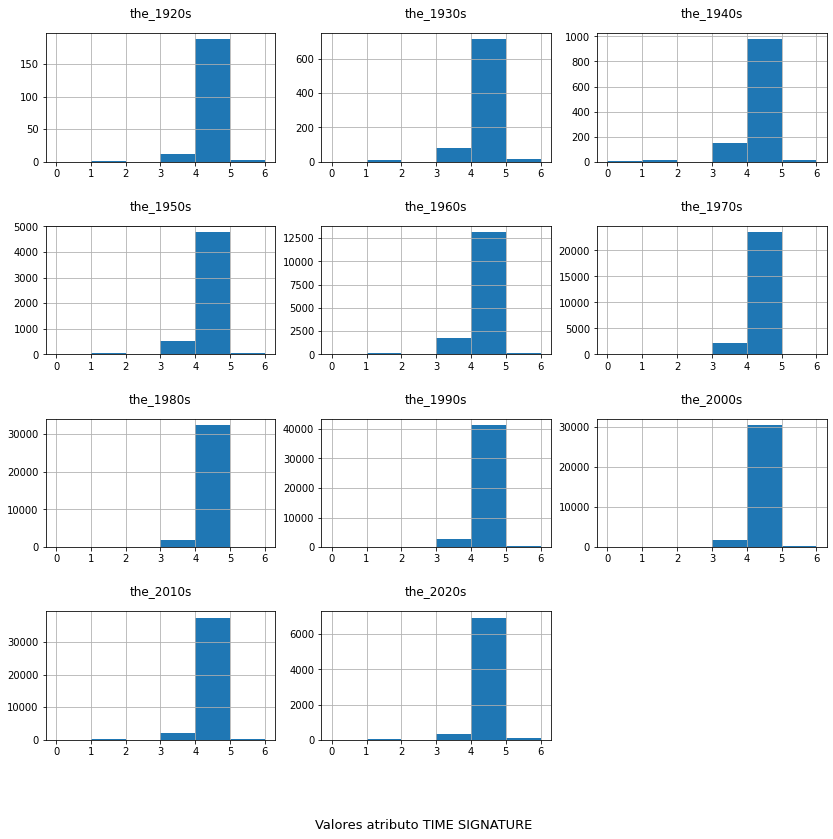

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(14, 13))
plt.subplots_adjust(hspace=0.5)
ax = axs.ravel()

fig.text(0.5, 0.03, 'Valores atributo TIME SIGNATURE', ha='center', fontsize=13)

i = 0
for years, df in time_signature_by_decades.items():
  df.hist(bins=range(7), ax=ax[i]).set_title(years, y=1.08)
  i += 1

fig.delaxes(axs[3][2])
plt.show()

ANÁLISE DE KEY DAS FAIXAS, DE ACORDO COM O GÊNERO

In [ ]:
time_signature_by_genres = df_merged.groupby('genre').time_signature.value_counts().sort_values()

Gêneros com menores agrupamentos de *time signature*

In [ ]:
time_signature_by_genres.head(30)

genre                        time_signature
21st century classical       1                 1
indie r&b                    1                 1
                             5                 1
indie rock italiano          5                 1
indie rock mexicano          5                 1
indie rock peruano           3                 1
indie rockism                4                 1
indie siciliano              3                 1
indie triste                 3                 1
indiecoustica                1                 1
                             5                 1
indietronica                 1                 1
indonesian alternative rock  1                 1
indonesian bamboo            3                 1
indonesian city pop          5                 1
indonesian death metal       3                 1
indonesian deathcore         3                 1
indonesian emo rap           4                 1
indonesian experimental      4                 1
indonesian idol pop      

Gêneros com maiores agrupamentos de *time signature*

In [ ]:
time_signature_by_genres.tail(30)

genre               time_signature
psychedelic rock    4                  5090
new wave pop        4                  5170
brill building pop  4                  5239
mpb                 4                  5317
latin alternative   4                  5484
latin rock          4                  5633
modern bollywood    4                  5715
c-pop               4                  6201
sufi                4                  6262
j-pop               4                  6361
soul                4                  6454
desi pop            4                  7049
pop                 4                  7098
country rock        4                  7202
rock en espanol     4                  7322
art rock            4                  7473
hard rock           4                  7485
latin pop           4                  7698
dance pop           4                  7789
tropical            4                  8684
folk rock           4                  8826
adult standards     4                  92

**Conclusões:**

1.   O tipo 4 de *time signature* foi o mais comum, independente de divisão por gêneros, ou décadas
2.   Em relação à divisão pro gêneros, os agrupamentos se devem mais ao fato da quantidade de faixas no dataset p/ cada gênero em si, do que devido ao atributo *time signature* em si



# DataFrame **RelatedArtists**

In [ ]:
related_artists

,id_artist,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0DheY5irMjBUeLybbCUEZ2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,0DlhY15l3wsrnlfGio2bjU,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,0DmRESX2JknGPQyO15yxg7,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,0DmhnbHjm1qw6NCYPeZNgJ,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,0Dn11fWM7vHQ3rinvWEl4E,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527363,1qDkZo6EZO7prhbTyh0kjE,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
527364,52E1p1CjGZPzI8qdbIodGs,5BPsbp0hZTomLFlVTgdbuj,0qtCZoFConPbcPfkwtqpx6,0g3fnSe3212EM0H45zVQvr,6IllWwuEZXv8D8Z3zq41Uu,3UqGUvLLvbbxxpg2GUTwnL,7vhukwVHbJwCHgzaobUlXG,0jm2LG0drmDo48H3glziUD,6ejhJjv5gHGP3QwsY0bhL8,1qDkZo6EZO7prhbTyh0kjE,...,0tD28H4LMua0acGEN1Bytg,0vtvMFEVjyZUkjZZjUN8Pw,114rf5BAHSpTOuHiHJ8AoH,2rjjDkYiXzWfGDwhkgtCwu,3cMoJnLJinh3xdO6OHuwE6,3qhVkLrZo0YV8HJKbVdCwC,3P3ctFURUm4yNRZeuvJzpv,3QqzpemmnuEXaCJo3MkPwq,4pWwoZtFdq4zPfyCMH10xs,4Rc8pP91qbI45rw3fLCeq5
527365,0yfrJ4JXXcChkrcFr5l8nN,70xqsSaFzoHsDjzaQnjvTW,02rbtsxmzmlWKtEZ4DLZr8,5BPsbp0hZTomLFlVTgdbuj,0g3fnSe3212EM0H45zVQvr,5E1U3plwlms90a9BBgVijN,0qtCZoFConPbcPfkwtqpx6,6IllWwuEZXv8D8Z3zq41Uu,4LFolM6aCwLIqzOS0soUp4,3UqGUvLLvbbxxpg2GUTwnL,...,1qDkZo6EZO7prhbTyh0kjE,103XEYtNA5jJRI49x3USJI,3VLXw7Phdo2mLlUoB5B59j,6n6VmhZHlbwcyxAMTHkfff,5J2sUIAE7PJNuPy6tbfGFF,2UmX87M1XsXn3p3mcabGN0,2zBogoEKvaZ8PoBASHBvzZ,6ejhJjv5gHGP3QwsY0bhL8,5iJ2SjQmyUNo68vLqqniAo,14UrUpszFj0N97hpFk7jyo
527366,6HvBQpMiWSkISfHF39vqXV,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


*   Vamos excluir os registros que não contenham Artistas Relacionados, isto é, aqueles que contém desde a primeira coluna nula



In [ ]:
related_artists = related_artists[related_artists[0].notnull()]

In [ ]:
related_artists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405709 entries, 14 to 527367
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id_artist  405709 non-null  object
 1   0          405709 non-null  object
 2   1          405436 non-null  object
 3   2          405199 non-null  object
 4   3          405001 non-null  object
 5   4          404820 non-null  object
 6   5          404654 non-null  object
 7   6          404483 non-null  object
 8   7          404296 non-null  object
 9   8          404107 non-null  object
 10  9          403854 non-null  object
 11  10         403023 non-null  object
 12  11         402279 non-null  object
 13  12         401520 non-null  object
 14  13         400865 non-null  object
 15  14         400211 non-null  object
 16  15         399594 non-null  object
 17  16         398963 non-null  object
 18  17         398350 non-null  object
 19  18         397757 non-null  object
 20  19 

# Feature Engineering - Textual Features

*   Para cada um dos artistas, vamos unir suas informações de gêneros, juntamente com os gêneros de todos seus artistas relacionados

In [ ]:
def collect_genres(artist):
  result = []
  if artist['genres'] != ['not specified'] : result.extend(artist['genres'])

  return result

In [ ]:
df_artists['related_genres_tags'] = df_artists.apply(collect_genres, axis=1)

In [ ]:
df_artists

,id,followers,genres,name,popularity,related_genres_tags
0,0DheY5irMjBUeLybbCUEZ2,0,[not specified],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0,[]
1,0DlhY15l3wsrnlfGio2bjU,5,[not specified],ปูนา ภาวิณี,0,[]
2,0DmRESX2JknGPQyO15yxg7,0,[not specified],Sadaa,0,[]
3,0DmhnbHjm1qw6NCYPeZNgJ,0,[not specified],Tra'gruda,0,[]
4,0Dn11fWM7vHQ3rinvWEl4E,2,[not specified],Ioannis Panoutsopoulos,0,[]
...,...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345,[not specified],Cody Longo,8,[]
1104345,1ljurfXKPlGncNdW3J8zJ8,2123,[deep acoustic pop],Right the Stars,18,[deep acoustic pop]
1104346,2vnT9YhKIvjVo9LnVjWmr2,26,[not specified],Jesse Giddings,0,[]
1104347,3ID0E5XCvnJIYZEq043ZoB,406,[not specified],The Boy Band Project,0,[]


Agora vamos organizar o Dataframe **RelatedArtists**, para buscarmos todas as informações dos artistas relacionados e integrá-las. Para isso, vamos:

1.   Criar uma copia do *df_artists* que possua o id_artist como index (para melhor busca e otimização do tempo de execução)
2.   Segregar a lista de RelatedArtists entre o artista principal e seus relacionados
3.   Coletar os dados de gêneros dos artistas relacionados
4.   Transferir o resultado acima para os respectivos artistas 



PREPARAÇÃO DOS DATASETS

In [ ]:
df_artists_indexed = df_artists.set_index('id').rename(columns={'related_genres_tags' : 'tags'})

original_arts = related_artists['id_artist']
rltd_arts = related_artists.drop(['id_artist'], axis=1)

COLETA E INTEGRAÇÃO DE DADOS DOS ARTISTAS RELACIONADOS

In [ ]:
def concatenate_tags(id_artist, data = data):

	return data.at[id_artist, 'tags'] if id_artist in data.index else ['']

In [ ]:
rltd_infos = rltd_arts.applymap(lambda x: concatenate_tags(x, data = df_artists_indexed))

In [ ]:
rltd_infos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
14,[],[],[spanish rock],[spanish rock],[spanish rock],[spanish rock],[],[],[],[],[],[],[],[],[],[spanish rock],[spanish folk rock],[spanish rock],[spanish rock],"[murcia indie, spanish modern rock, spanish rock]"
44,[],[],"[italian disco, new wave pop]",[italian disco],[],[],[soft rock],[swedish melodic rock],[italian disco],[italian disco],[],[],[],[new wave pop],[],[],[],[],[],"[classic italian pop, europop, italian adult p..."
45,[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz]
46,[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz]
47,[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz],[carnaval cadiz]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527359,"[metallic hardcore, pennsylvania hardcore]","[emoviolence, metallic hardcore]","[nz hardcore, nz punk, vegan straight edge]","[chaotic hardcore, post-doom metal, screamo, s...","[australian post-hardcore, metallic hardcore, ...","[long island punk, metallic hardcore, nyhc]","[australian post-hardcore, metallic hardcore]",[australian metalcore],"[metallic hardcore, progressive deathcore]","[mathcore, skramz]",[],[australian hardcore],[australian hardcore],"[mathcore, metallic hardcore]","[australian post-hardcore, melodic hardcore]",[australian metalcore],[emo rap],"[australian hardcore, melodic hardcore]","[mathcore, metallic hardcore]",[australian post-hardcore]
527362,[],[],[],[],[],[],[],[],[],"[alternative pop rock, neon pop punk]","[alternative pop rock, neon pop punk, pixie, p...",[],[],"[alternative pop rock, neon pop punk, pop emo,...",[],[],[],"[alternative pop rock, neon pop punk, pixie, p...",[],"[alternative pop rock, neon pop punk, pixie, p..."
527364,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
527365,[australian singer-songwriter],"[australian indie, australian indie folk]",[],[],[],[],[],[],[],[],[],[],"[australian indie folk, australian pop, indie ...",[],[],[],[],[],[],[]


In [ ]:
related = rltd_infos[0] + rltd_infos[1] + rltd_infos[2] + rltd_infos[3] + rltd_infos[4] + rltd_infos[5] + rltd_infos[6] + rltd_infos[7] + rltd_infos[8] + rltd_infos[9] + rltd_infos[10] + rltd_infos[11] + rltd_infos[12] + rltd_infos[13] + rltd_infos[14] + rltd_infos[15] + rltd_infos[16] + rltd_infos[17] + rltd_infos[18] + rltd_infos[19]

In [ ]:
related_informations = pd.DataFrame(data = {'artist' : original_arts, 'tags' : related}).set_index('artist')

In [ ]:
related_informations

,tags
artist,
0DvvojCMIqsOT1Btiwvq1h,"[spanish rock, spanish rock, spanish rock, spa..."
6S3nAGEmdt4nhPrtBJ56Ga,"[italian disco, new wave pop, italian disco, s..."
0VLMVnVbJyJ4oyZs2L3Yl2,"[carnaval cadiz, carnaval cadiz, carnaval cadi..."
0dt23bs4w8zx154C5xdVyl,"[carnaval cadiz, carnaval cadiz, carnaval cadi..."
0pGhoB99qpEJEsBQxgaskQ,"[carnaval cadiz, carnaval cadiz, carnaval cadi..."
...,...
3LeJRcb6dmaemRpbnNXjeO,"[metallic hardcore, pennsylvania hardcore, emo..."
587OTrMEOVrnWxnNMAVQlJ,"[alternative pop rock, neon pop punk, alternat..."
52E1p1CjGZPzI8qdbIodGs,[]


In [ ]:
df_artists['related_genres_tags'] = df_artists['related_genres_tags'] + df_artists['id'].apply(lambda x : concatenate_tags(x, data = related_informations))

# Atualiza o df_artists_indexed, para replicar a nova concatenação
df_artists_indexed = df_artists.set_index('id').rename(columns={'related_genres_tags' : 'tags'})

In [ ]:
df_artists

,id,followers,genres,name,popularity,related_genres_tags
0,0DheY5irMjBUeLybbCUEZ2,0,[not specified],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0,[]
1,0DlhY15l3wsrnlfGio2bjU,5,[not specified],ปูนา ภาวิณี,0,[]
2,0DmRESX2JknGPQyO15yxg7,0,[not specified],Sadaa,0,[]
3,0DmhnbHjm1qw6NCYPeZNgJ,0,[not specified],Tra'gruda,0,[]
4,0Dn11fWM7vHQ3rinvWEl4E,2,[not specified],Ioannis Panoutsopoulos,0,[]
...,...,...,...,...,...,...
1104344,6rJIG42vcWAf1UBdRFlQxB,3345,[not specified],Cody Longo,8,[]
1104345,1ljurfXKPlGncNdW3J8zJ8,2123,[deep acoustic pop],Right the Stars,18,"[deep acoustic pop, ]"
1104346,2vnT9YhKIvjVo9LnVjWmr2,26,[not specified],Jesse Giddings,0,[]
1104347,3ID0E5XCvnJIYZEq043ZoB,406,[not specified],The Boy Band Project,0,[]


INTEGRAÇÃO DAS *TAGS* DE FAIXAS


*   Este comando (atualmente desabilitado) serve pra juntar todos os gêneros dos artistas p/ cada faixa
*   Para reabailitá-lo, basta 'descomentar' a chamada *apply* abaixo



In [ ]:
def tracks_tags_composer(track_artists):
  result = []

  for id in track_artists:
    result.extend(concatenate_tags(id, data = df_artists_indexed))

  return result

In [ ]:
#df_tracks['textual_tags'] = df_tracks['id_artists'].apply(lambda x : tracks_tags_composer(x))

ORGANIZAÇÃO DAS *TAGS* GERADAS

In [ ]:
def organize_tags(artist):
  tags = []

  # Marca com letra maíuscula todas as tags e retira todos os espaços entre as palavras
  # Descarta as tags nulas, isto é, aquelas sem conteúdo 
  for tag in artist['related_genres_tags']:
    if tag != "" : tags.append(tag.title().replace(" ", ""))

  # Descarta tags repetidas para um mesmo artista
  tags = list(dict.fromkeys(tags))

  # Converte a lista de tags numa string única, para ser usada na criação do modelo mais adiante
  tags = ' '.join([str(tg) for tg in tags])

  return tags

In [ ]:
df_artists['related_genres_tags'] = df_artists.apply(organize_tags, axis=1)

In [ ]:
df_artists['related_genres_tags']

0                         
1                         
2                         
3                         
4                         
                ...       
1104344                   
1104345    DeepAcousticPop
1104346                   
1104347                   
1104348                   
Name: related_genres_tags, Length: 1104349, dtype: object

In [ ]:
df_artists_resulted = df_artists.copy()

In [ ]:
df_artists_resulted.to_csv('df_artists_resulted.csv', index=False) 

# Feature Engineering - Numerical Features

*   Para fins de uso no modelo de Machine Learning, todos os *Features* Numéricos serão convertidos para uma mesma escala
*   Tal escala vai de 0 até 1



In [ ]:
df_tracks

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,00:05:10,0,[Greg Fieler],[5nWlsH5RDgFuRAiDeOFVmf],1922,0.488,0.475,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.544,139.952,4
46,1l1Wk0nOkuMCzioN6l2yfJ,Carol of the Bells,0,00:04:46,0,[Grandcubby Trio],[4XVZpokXbUzg6QeomBANY9],1922,0.382,0.750,10,-11.599,1,0.0742,0.123,0.751000,0.7250,0.346,149.787,3
51,1v0HtSUeQOu3ba28pvYE5y,Chicago (That Toddlin' Town),0,00:01:51,0,[Jim Chapman],[0DhFxctImIYNNSEHuLQi5U],1922,0.491,0.439,4,-11.356,0,0.1050,0.626,0.000000,0.3210,0.792,180.653,4
112,598LlBn6jpEpVbLjmZPsYV,Graphite,0,00:01:44,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.644,0.684,7,-8.247,1,0.1990,0.144,0.802000,0.0847,0.138,100.031,4
131,6MD9XSLD4VmVI5SFRPm6By,Car Loans,0,00:02:52,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.651,0.574,10,-11.999,0,0.1040,0.474,0.713000,0.0597,0.412,99.878,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586664,1Kzjk1EyngBcP4T8x3fyqv,同行 (新加坡電視劇《愛...沒有距離》主題曲),43,00:03:25,0,[Boon Hui Lu],[6PWJWwEm8BSBFAIAUWlwe4],2020,0.743,0.679,8,-3.952,1,0.0323,0.269,0.000000,0.1330,0.395,126.070,4
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,00:01:46,0,[Emilie Chin],[4USdOnfLczwUglA3TrdHs2],2020,0.626,0.530,5,-13.117,0,0.0284,0.113,0.856000,0.1040,0.215,120.113,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,00:02:33,0,[ROLE MODEL],[1dy5WNgIKQU6ezkpZs4y8z],2020,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.686,150.091,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,00:02:22,0,"[Gentle Bones, Clara Benin]","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",2021,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.438,90.029,4


In [ ]:
df_tracks_resulted = df_tracks.copy()

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

features = ['danceability', 'energy', 'key', 'loudness', 
            'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'time_signature']

for f in features:
  df_tracks_resulted[f] = min_max_scaler.fit_transform(df_tracks[f].to_numpy().reshape(-1, 1))

In [ ]:
df_tracks_resulted

,id,name,popularity,duration,explicit,artists,id_artists,release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,00:05:10,0,[Greg Fieler],[5nWlsH5RDgFuRAiDeOFVmf],1922,0.492432,0.475,0.000000,0.677846,0.0,0.121277,0.792839,0.006450,0.1070,0.544,0.568031,0.8
46,1l1Wk0nOkuMCzioN6l2yfJ,Carol of the Bells,0,00:04:46,0,[Grandcubby Trio],[4XVZpokXbUzg6QeomBANY9],1922,0.385469,0.750,0.909091,0.749427,1.0,0.225532,0.157289,0.751000,0.7250,0.346,0.607949,0.6
51,1v0HtSUeQOu3ba28pvYE5y,Chicago (That Toddlin' Town),0,00:01:51,0,[Jim Chapman],[0DhFxctImIYNNSEHuLQi5U],1922,0.495459,0.439,0.363636,0.753190,0.0,0.319149,0.800512,0.000000,0.3210,0.792,0.733226,0.8
112,598LlBn6jpEpVbLjmZPsYV,Graphite,0,00:01:44,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.649849,0.684,0.636364,0.801329,1.0,0.604863,0.184143,0.802000,0.0847,0.138,0.406001,0.8
131,6MD9XSLD4VmVI5SFRPm6By,Car Loans,0,00:02:52,0,[Uli],[45tIt06XoI0Iio4LBEVpls],1922,0.656912,0.574,0.909091,0.743234,0.0,0.316109,0.606138,0.713000,0.0597,0.412,0.405380,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586664,1Kzjk1EyngBcP4T8x3fyqv,同行 (新加坡電視劇《愛...沒有距離》主題曲),43,00:03:25,0,[Boon Hui Lu],[6PWJWwEm8BSBFAIAUWlwe4],2020,0.749748,0.679,0.727273,0.867831,1.0,0.098176,0.343990,0.000000,0.1330,0.395,0.511687,0.8
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,00:01:46,0,[Emilie Chin],[4USdOnfLczwUglA3TrdHs2],2020,0.631685,0.530,0.454545,0.725923,0.0,0.086322,0.144501,0.856000,0.1040,0.215,0.487509,0.8
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,00:02:33,0,[ROLE MODEL],[1dy5WNgIKQU6ezkpZs4y8z],2020,0.771948,0.663,0.000000,0.848151,1.0,0.198176,0.180307,0.000297,0.0924,0.686,0.609183,0.8
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,00:02:22,0,"[Gentle Bones, Clara Benin]","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",2021,0.702321,0.615,0.909091,0.832838,1.0,0.104863,0.263427,0.000003,0.3050,0.438,0.365406,0.8


In [ ]:
df_tracks_resulted.to_csv('df_tracks_resulted.csv', index=False) 